In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re


alerts_df3 = pd.read_csv("./combined_status_tracker.csv")
#print(alerts_df3)

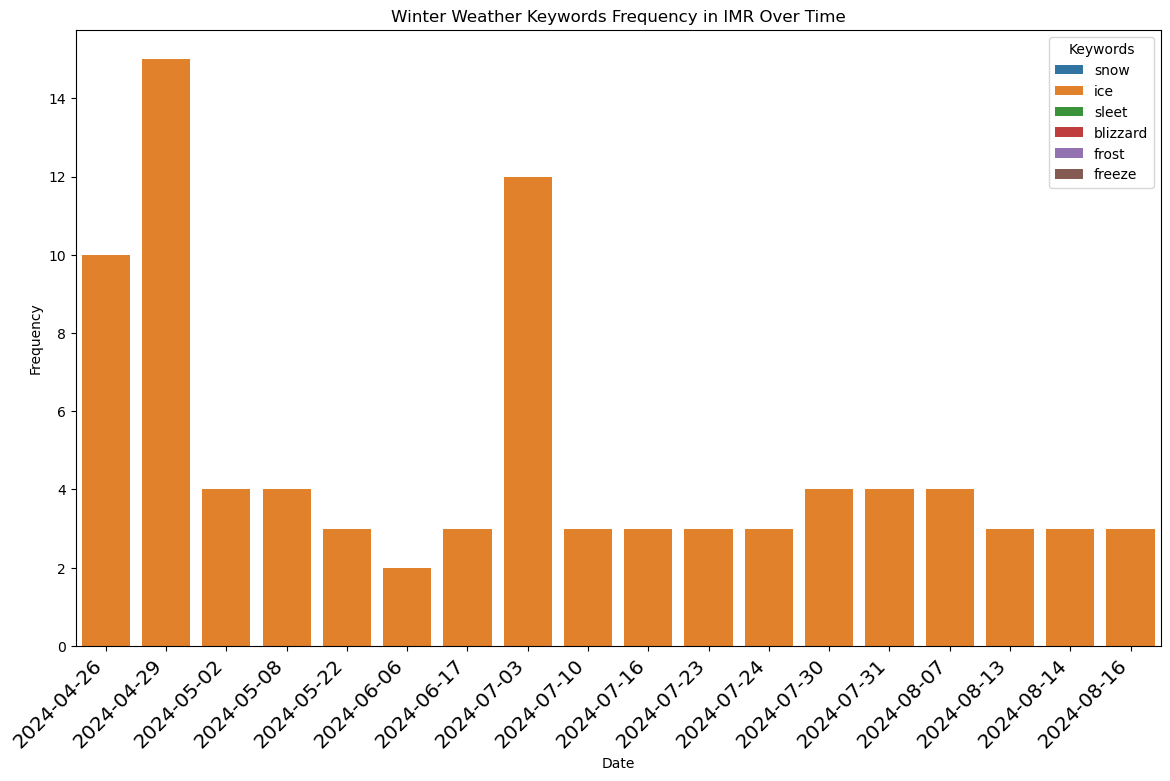

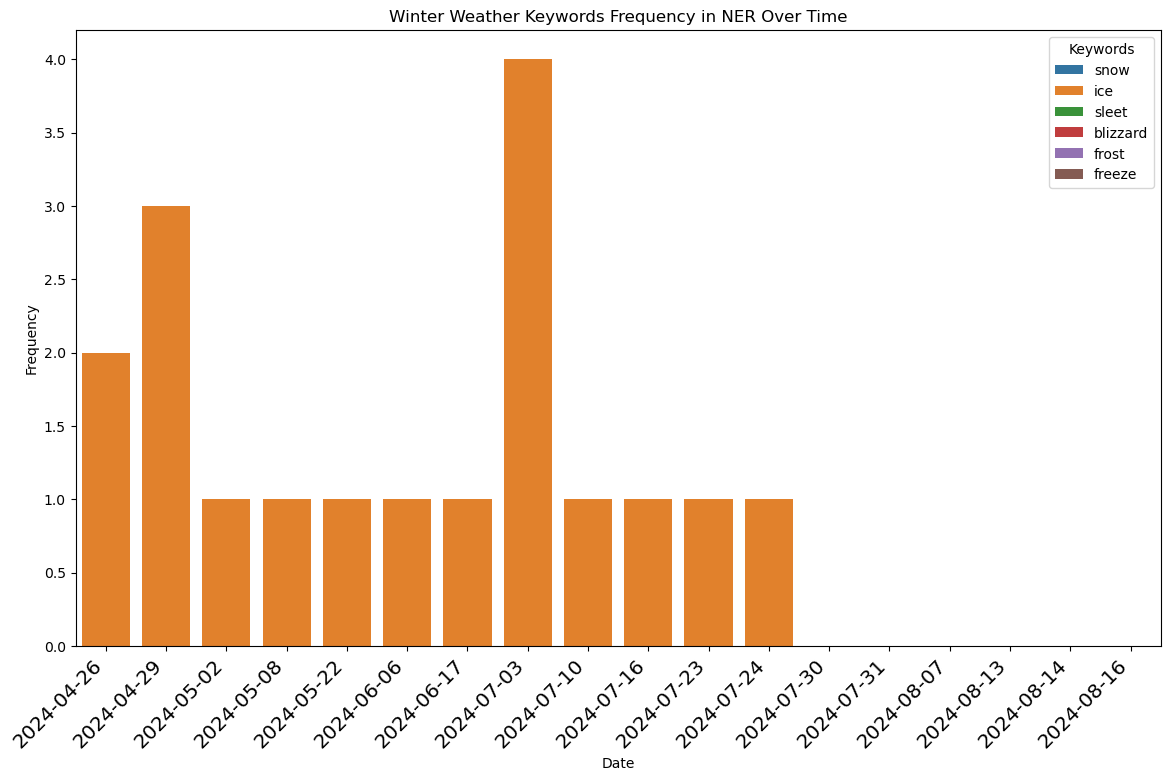

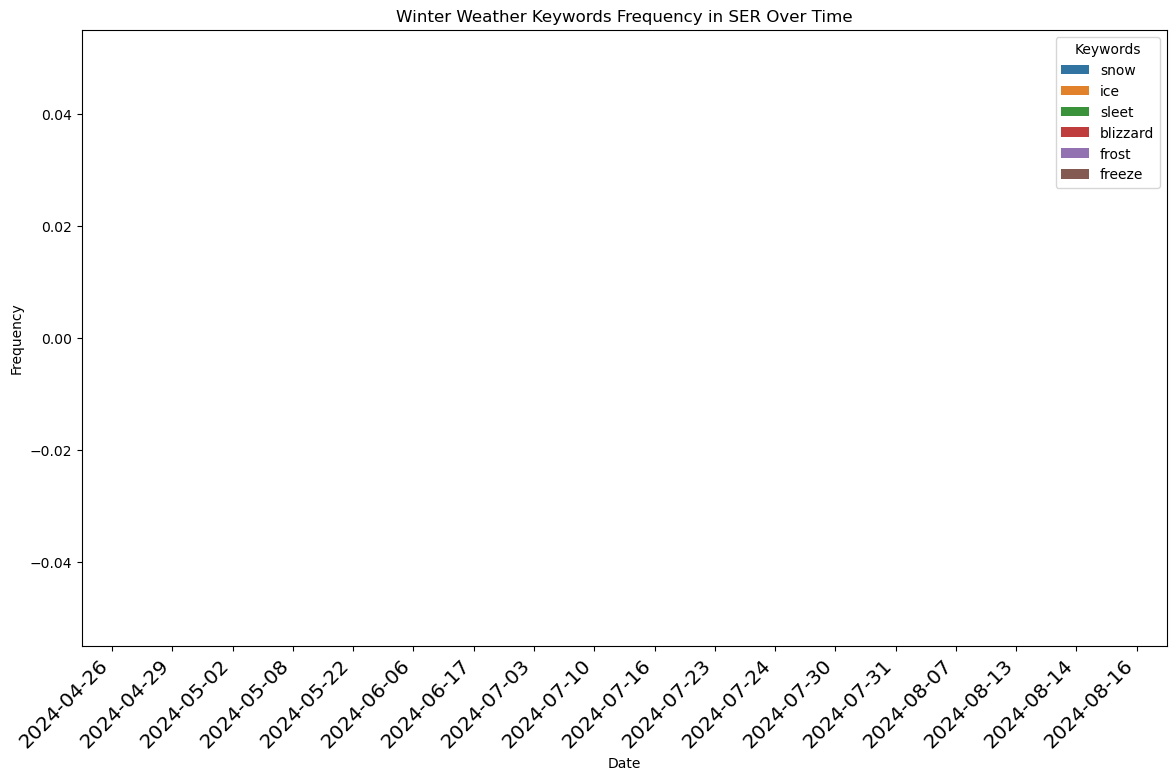

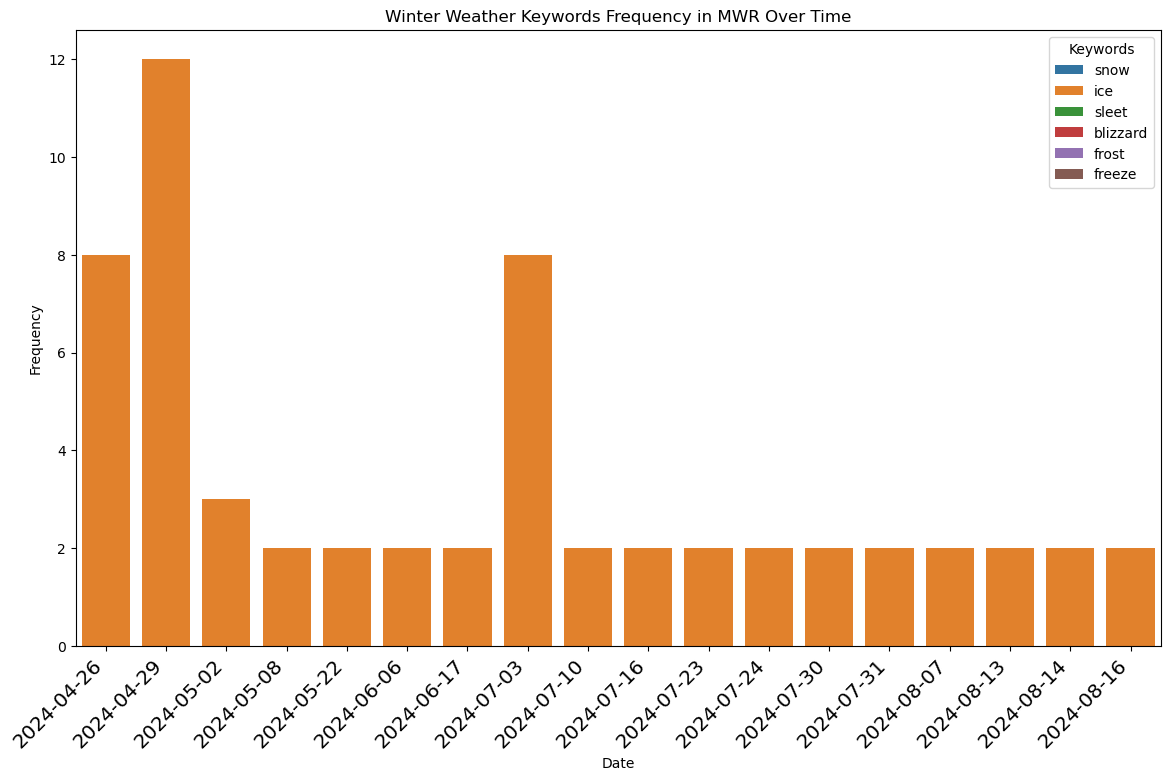

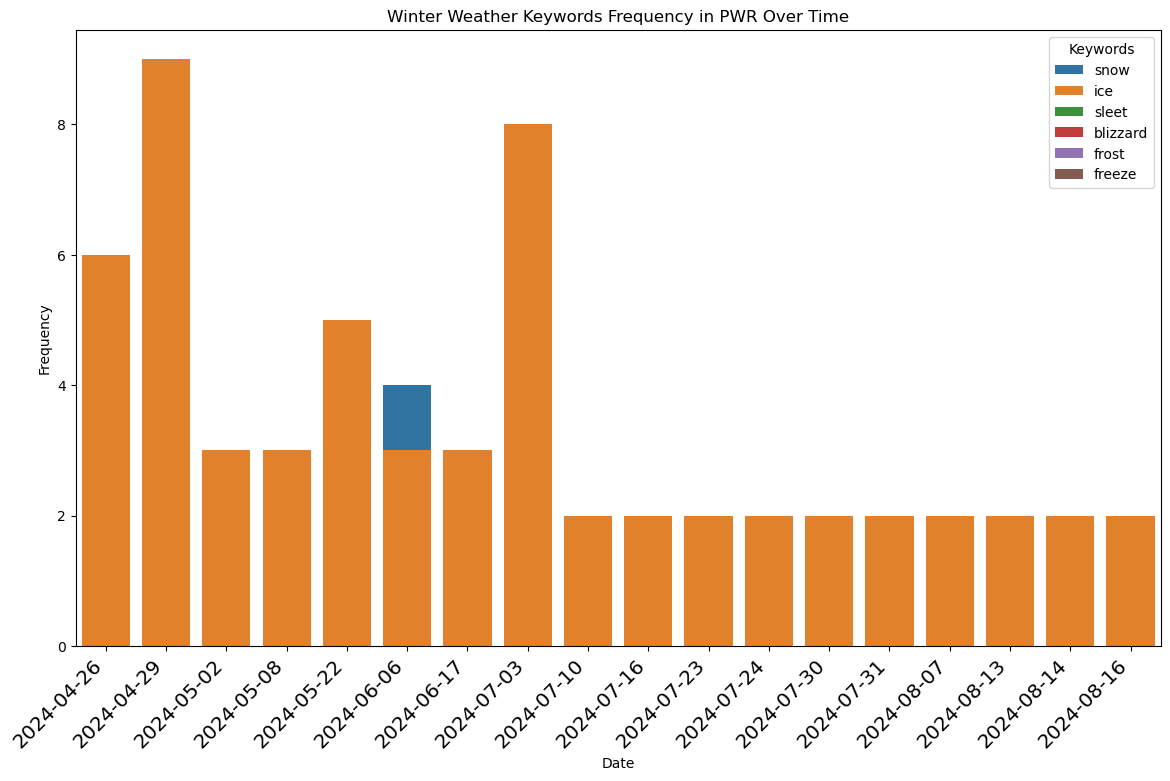

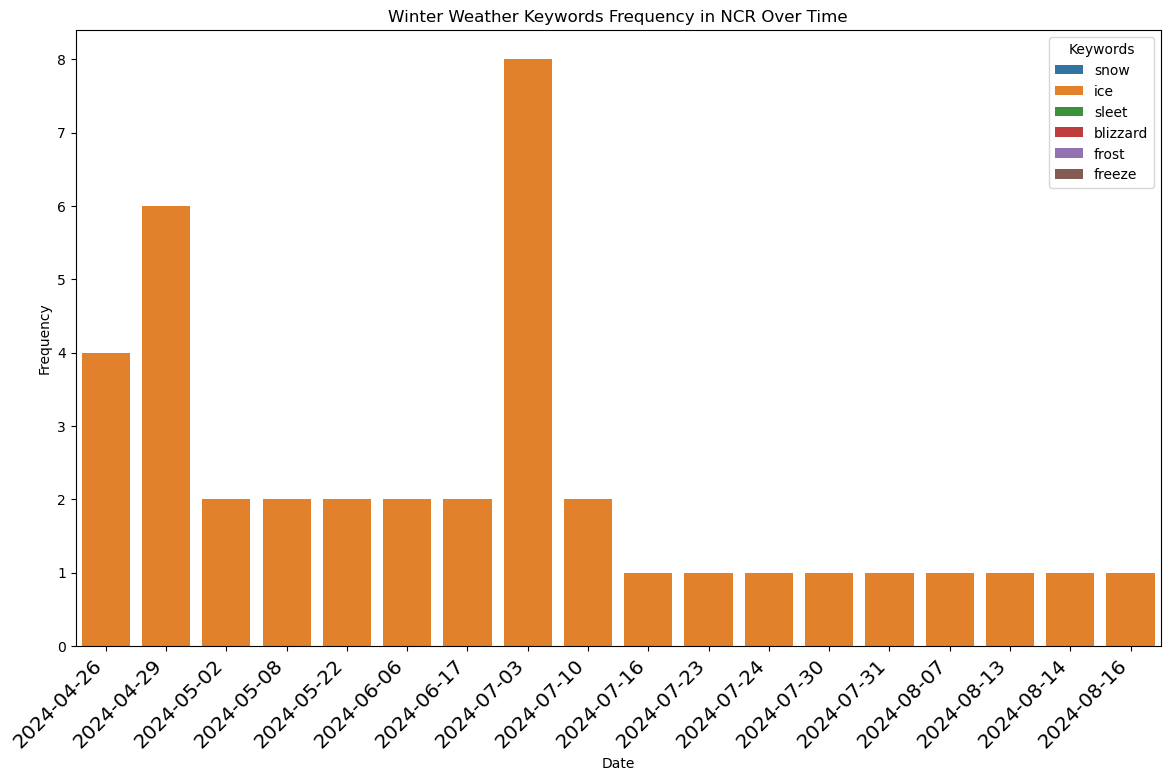

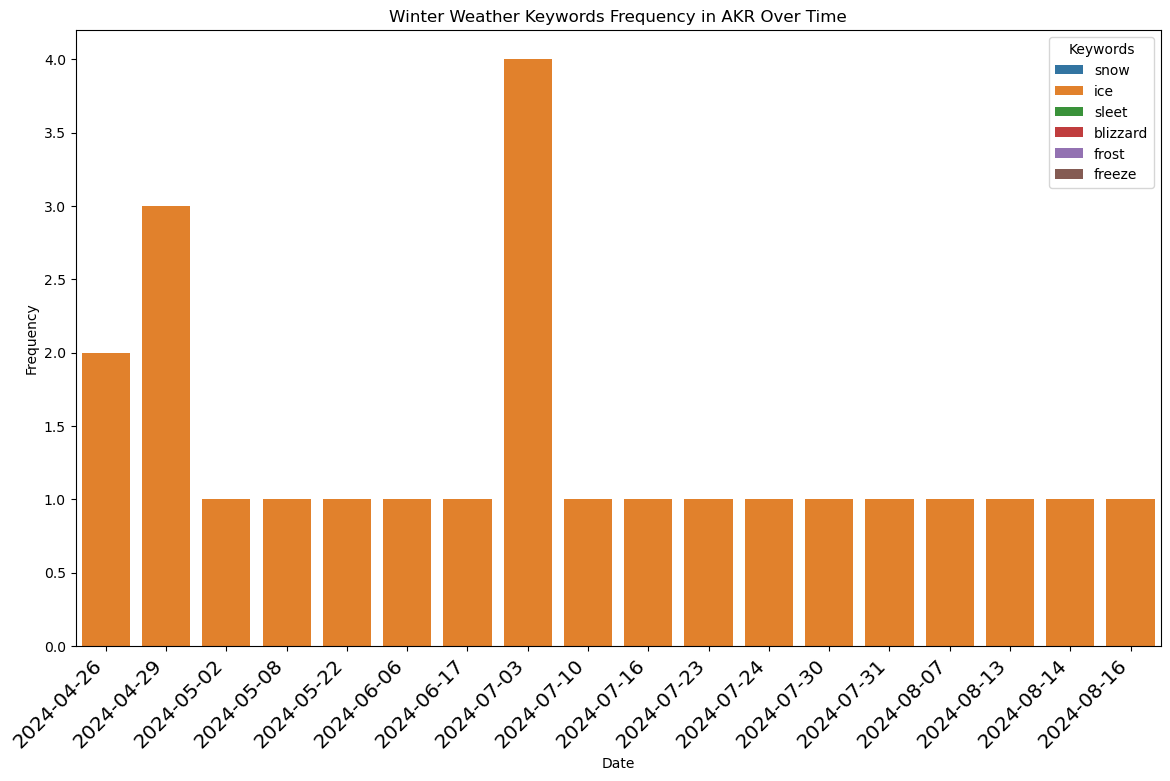

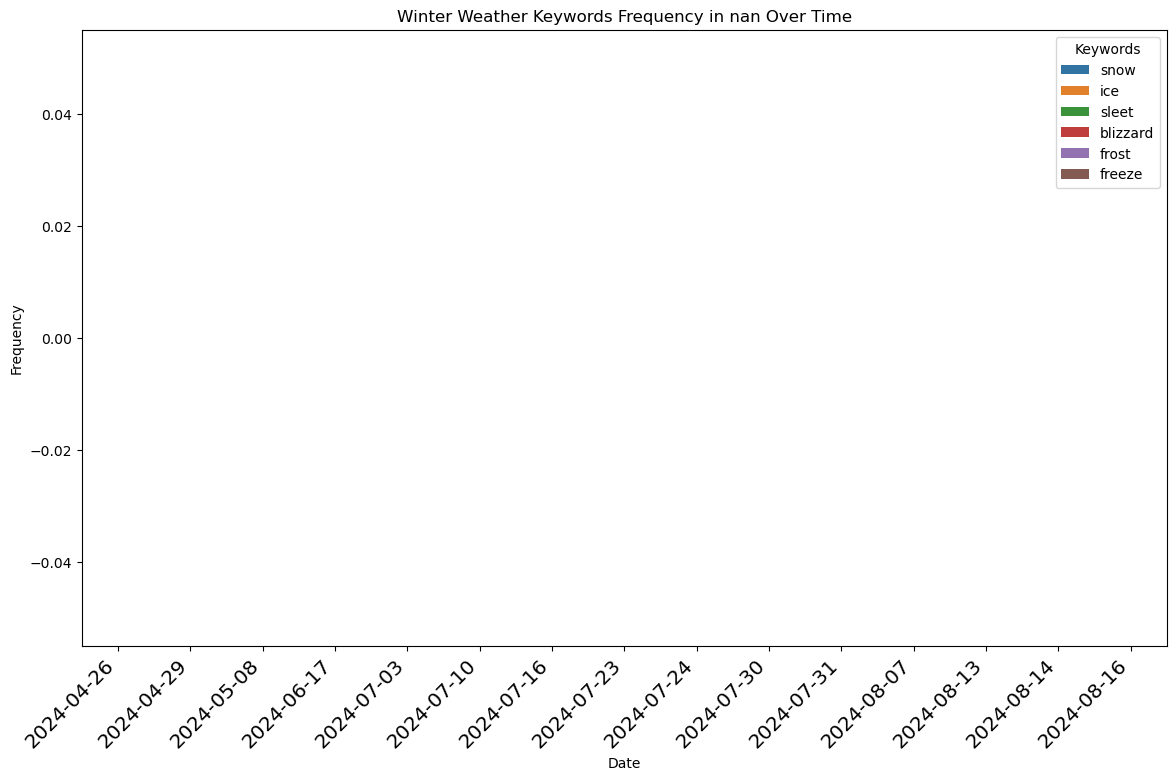

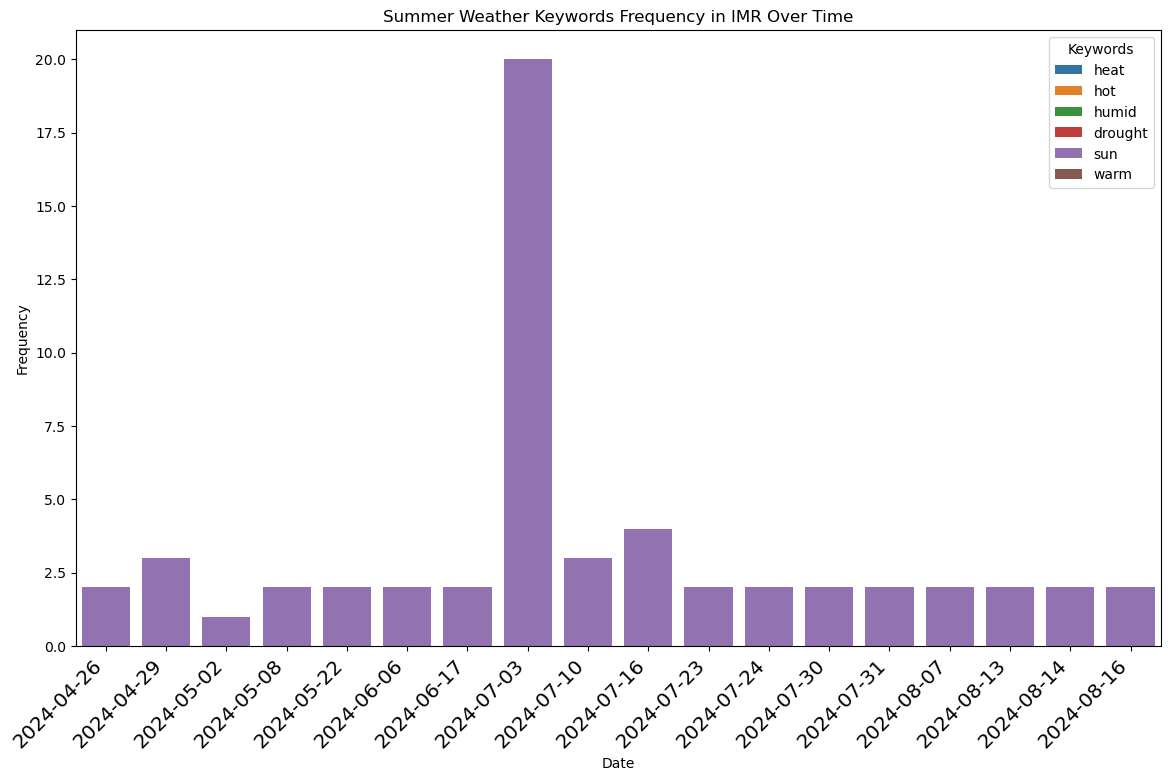

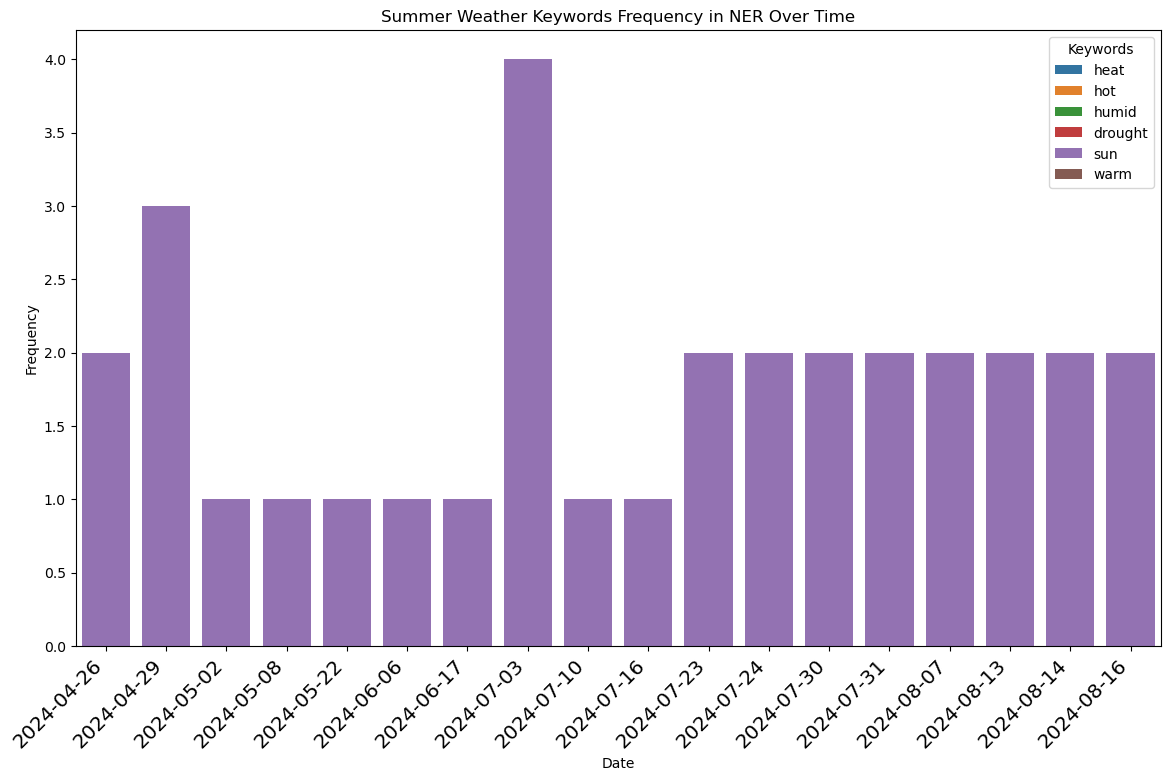

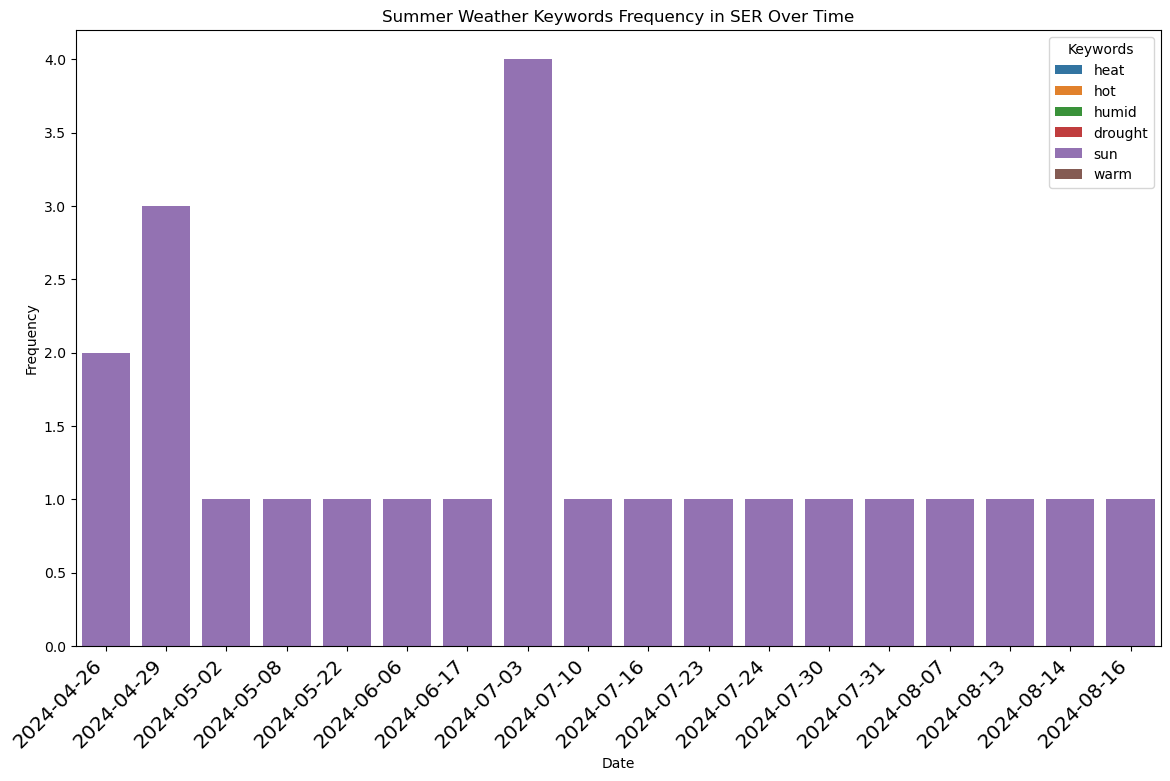

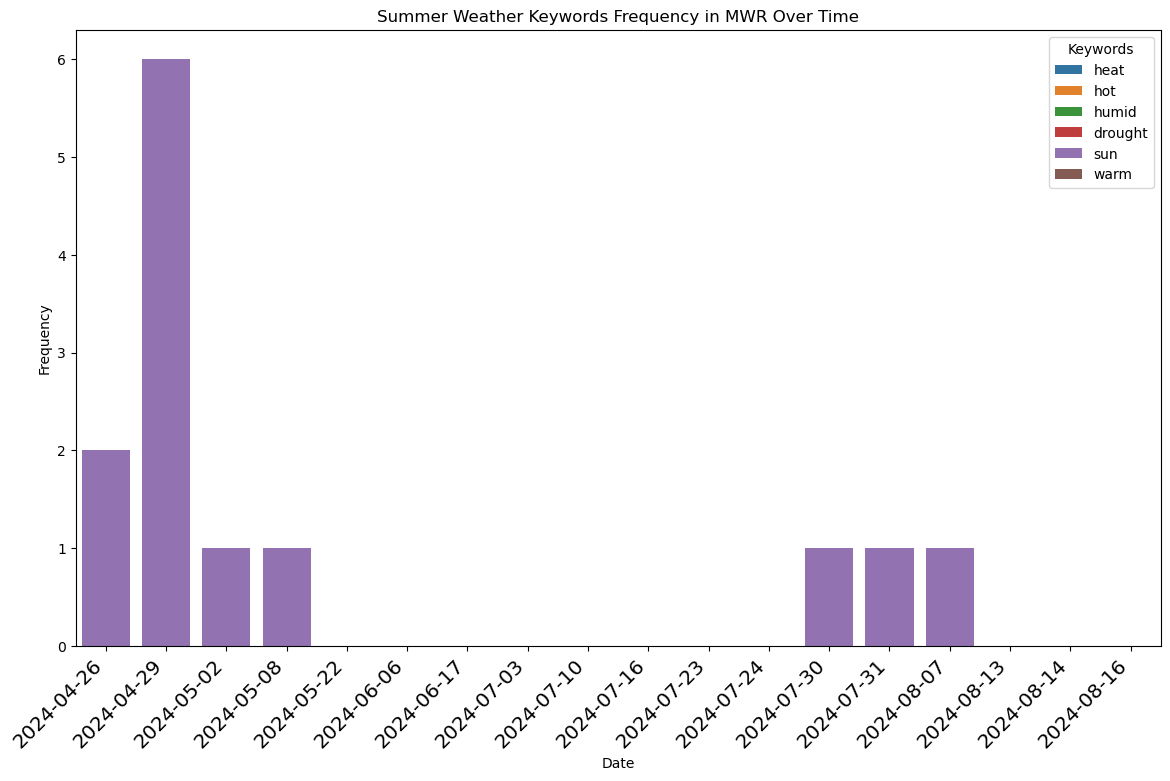

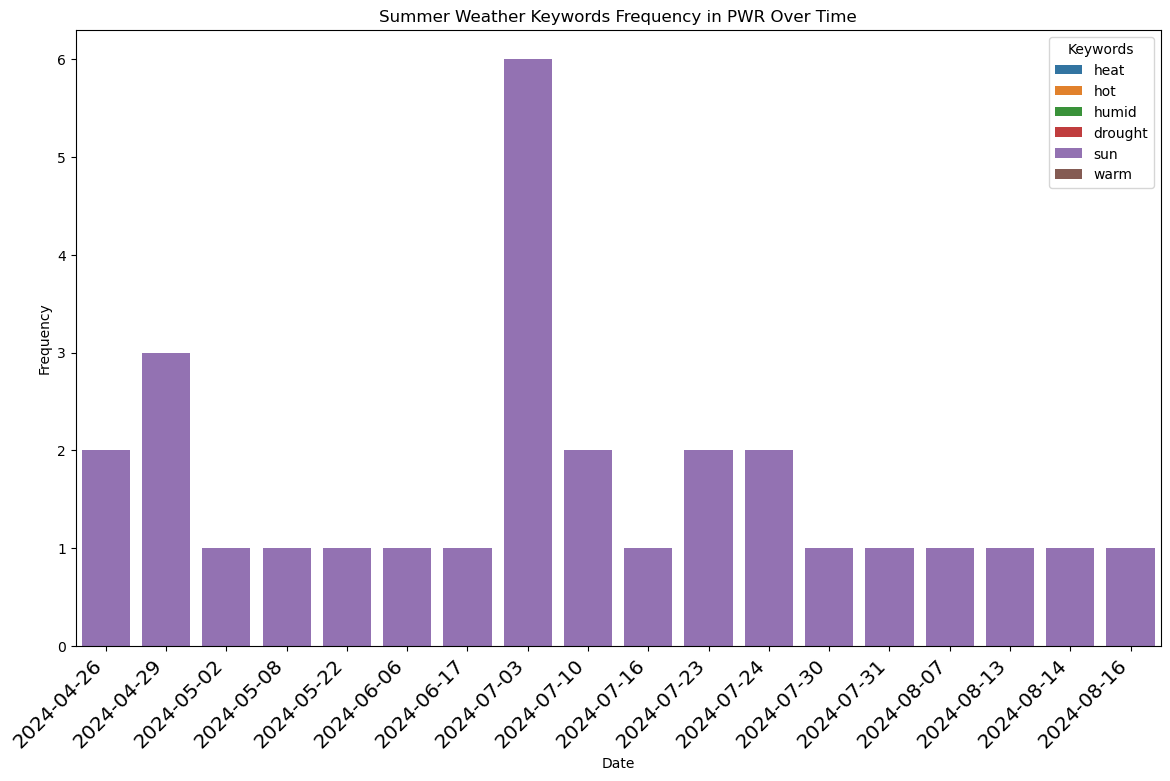

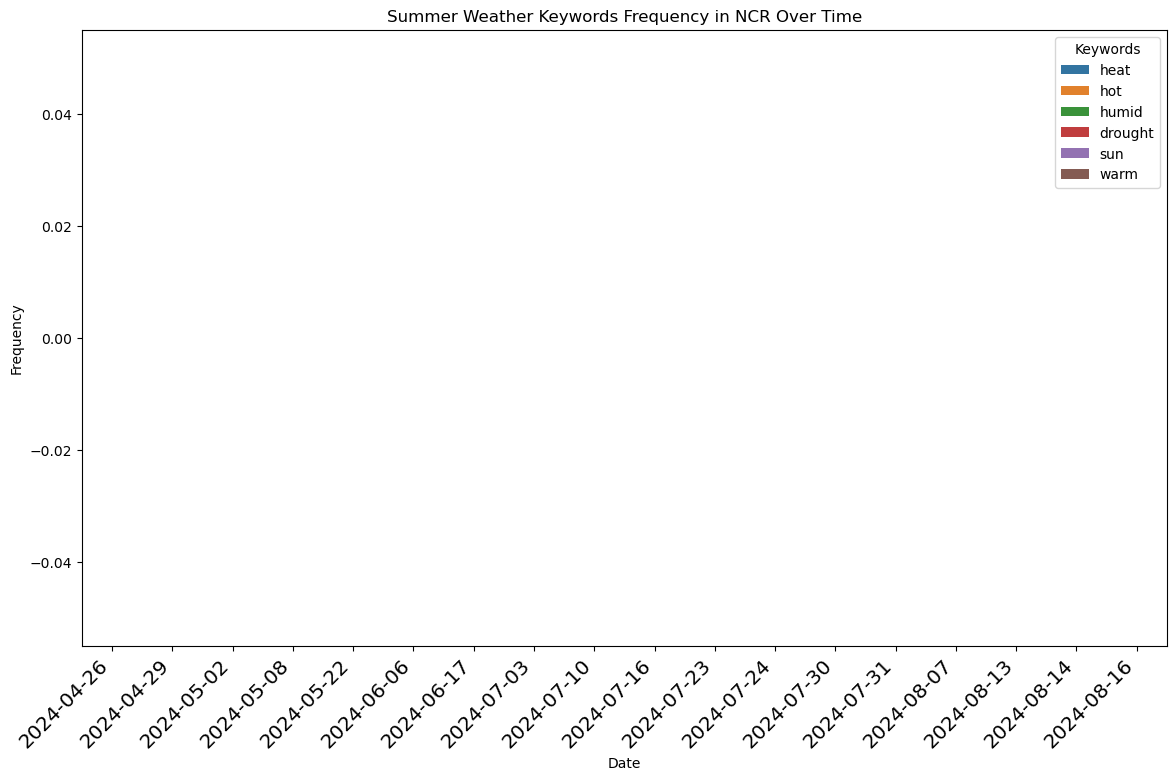

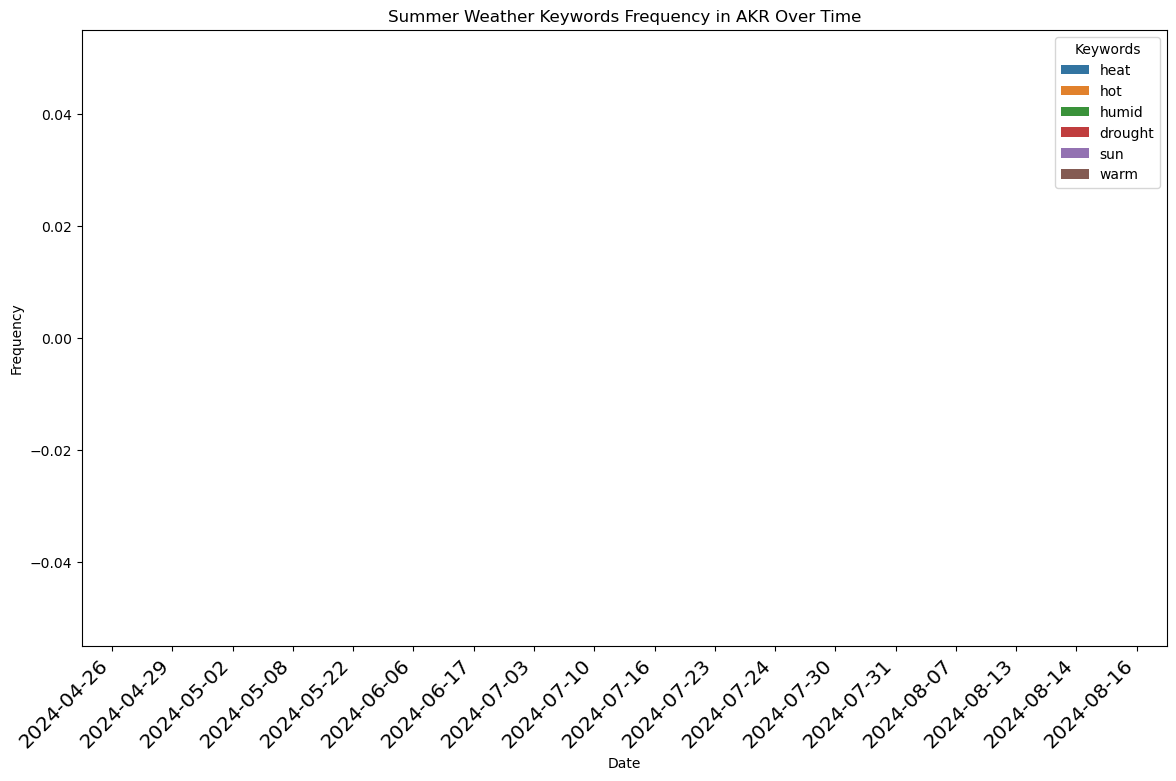

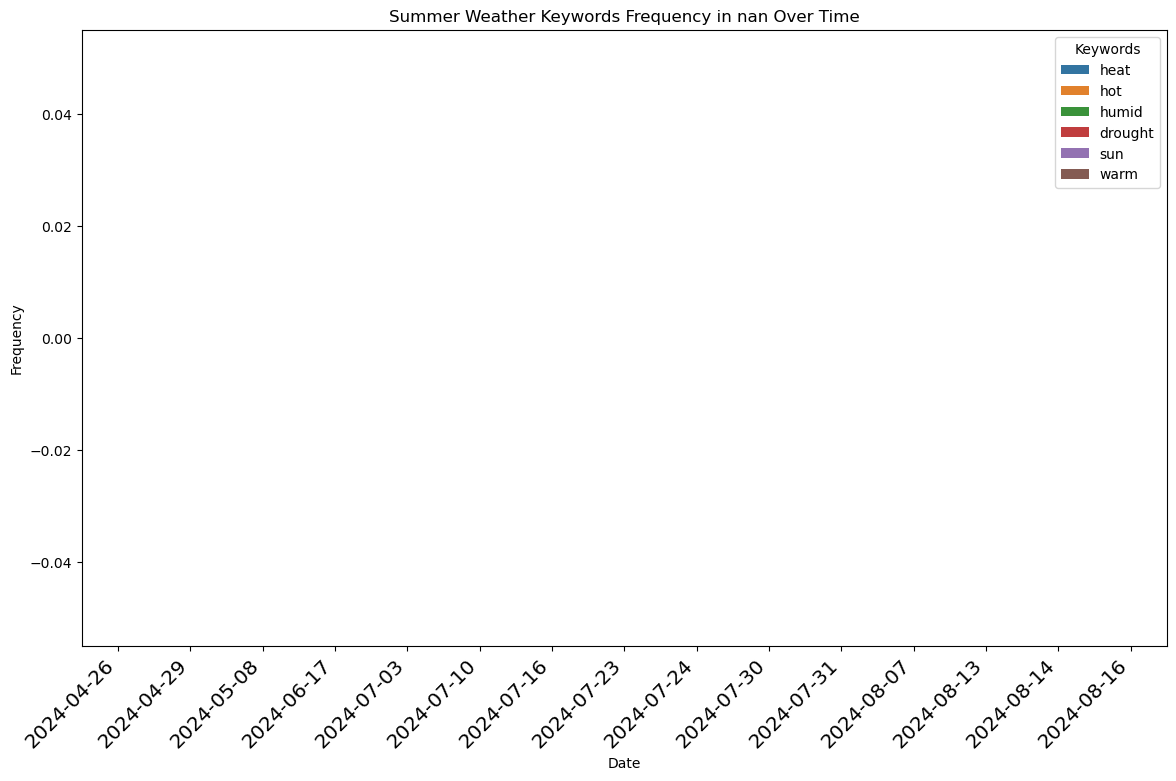

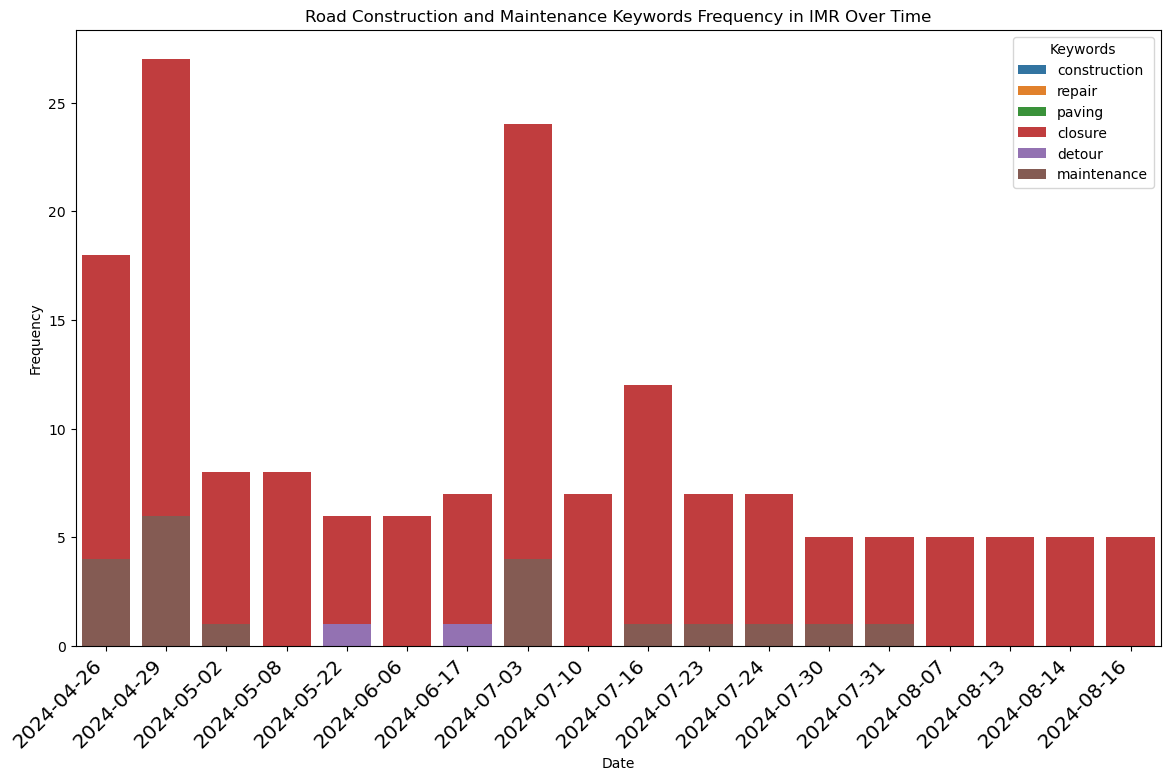

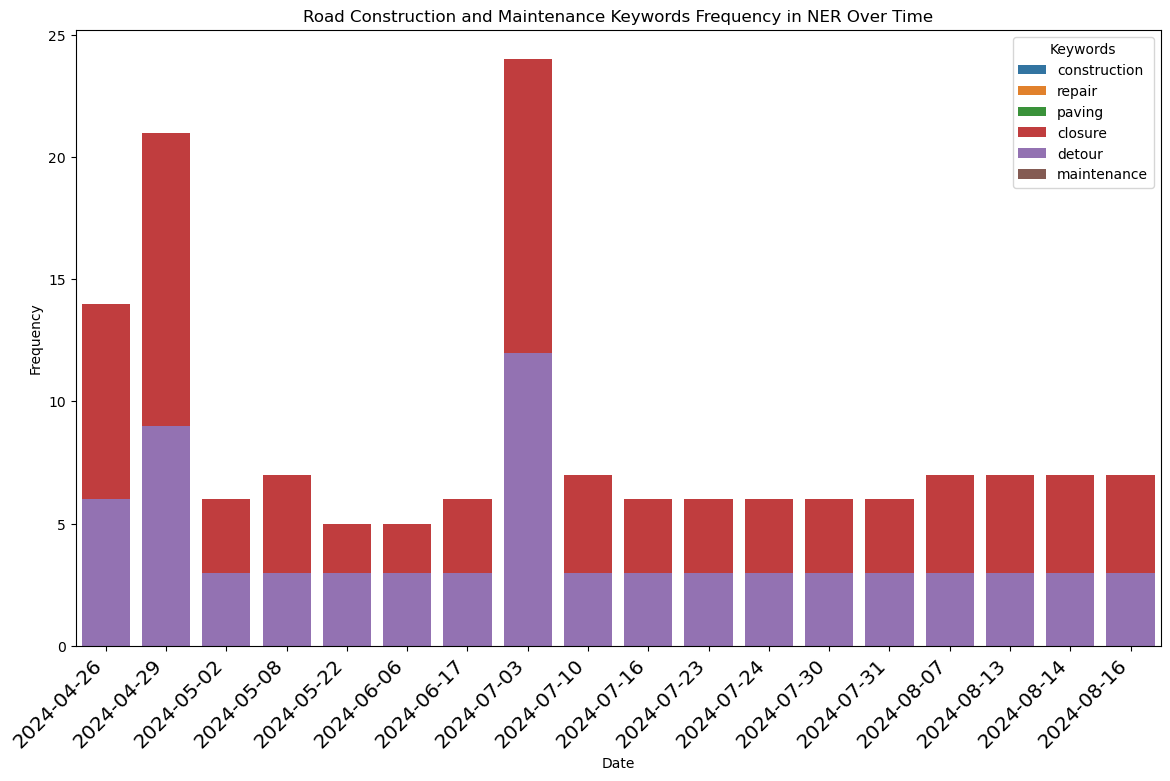

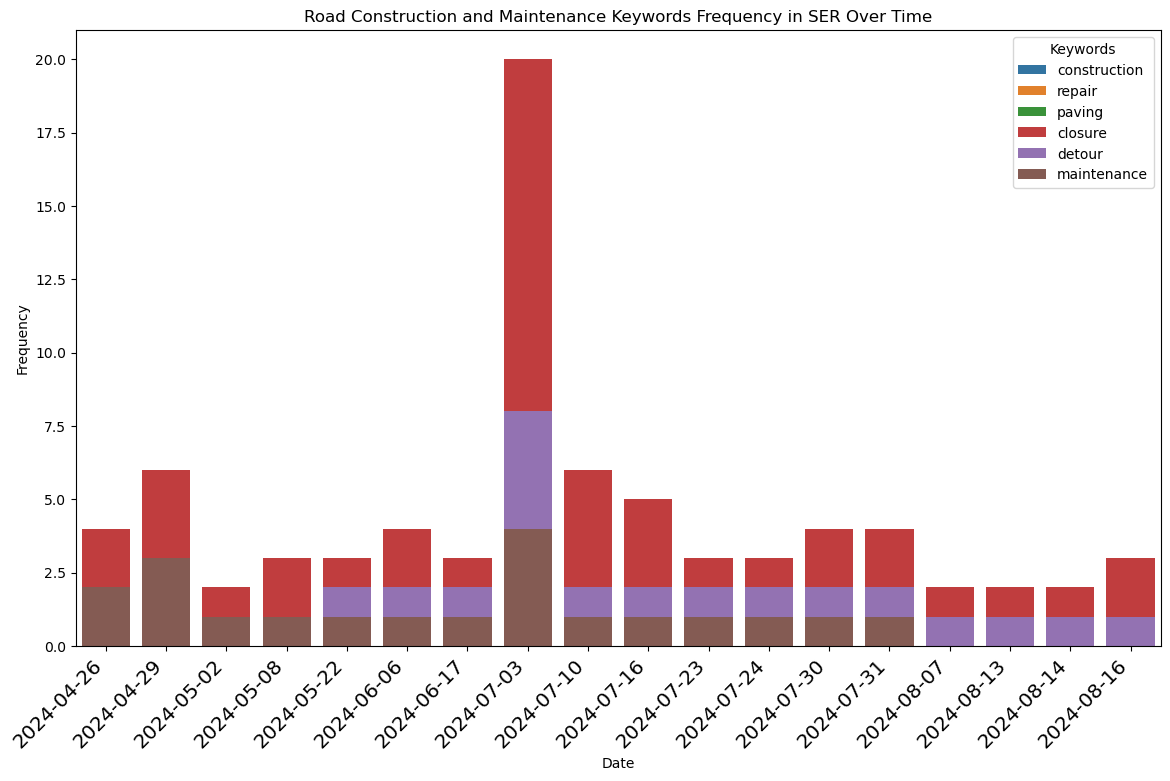

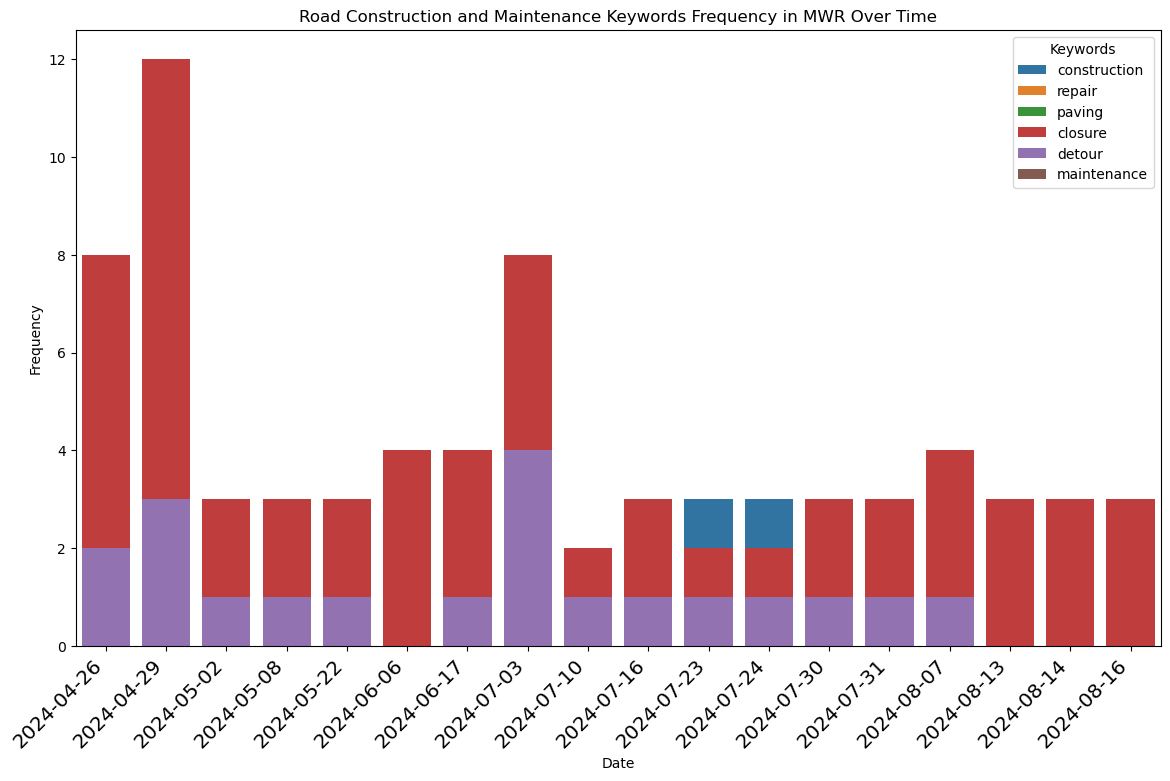

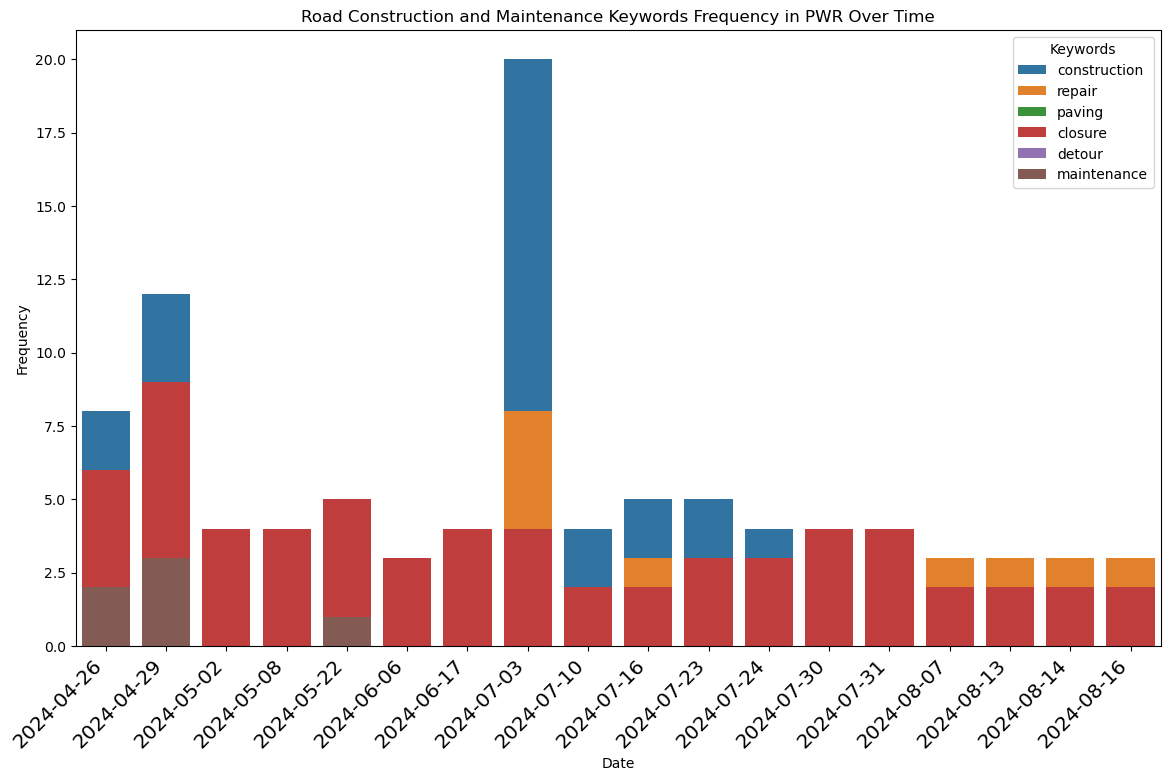

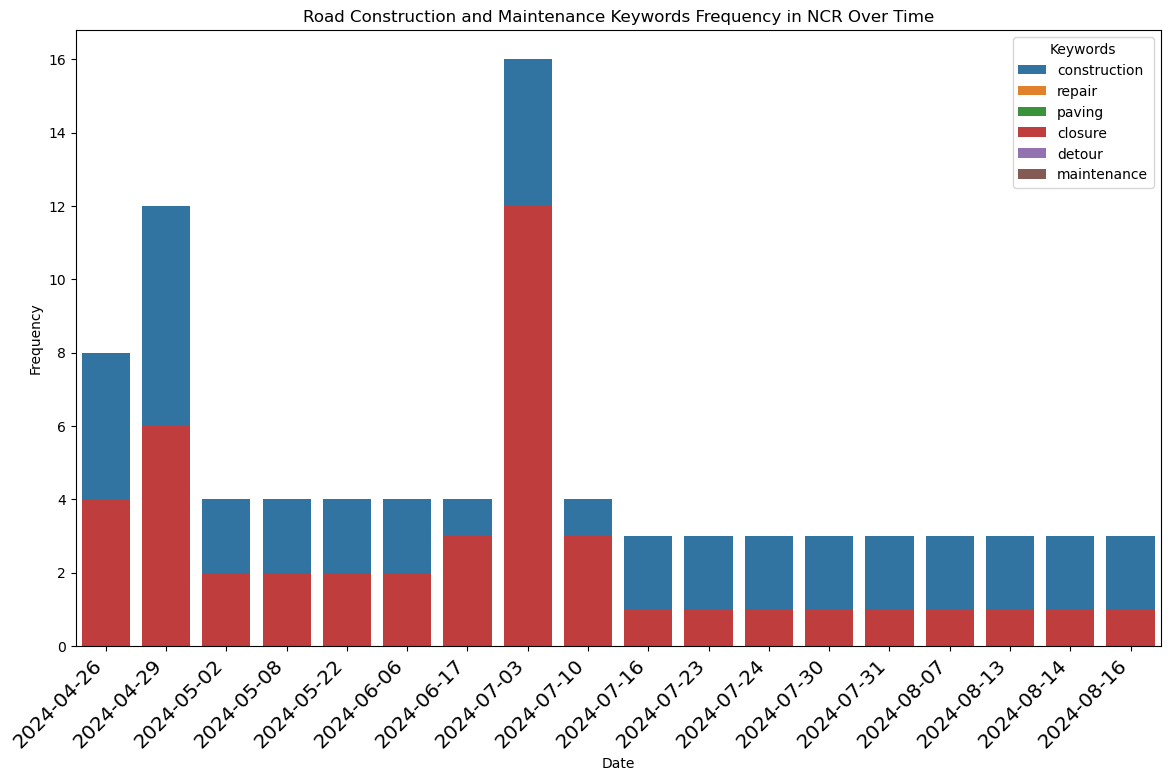

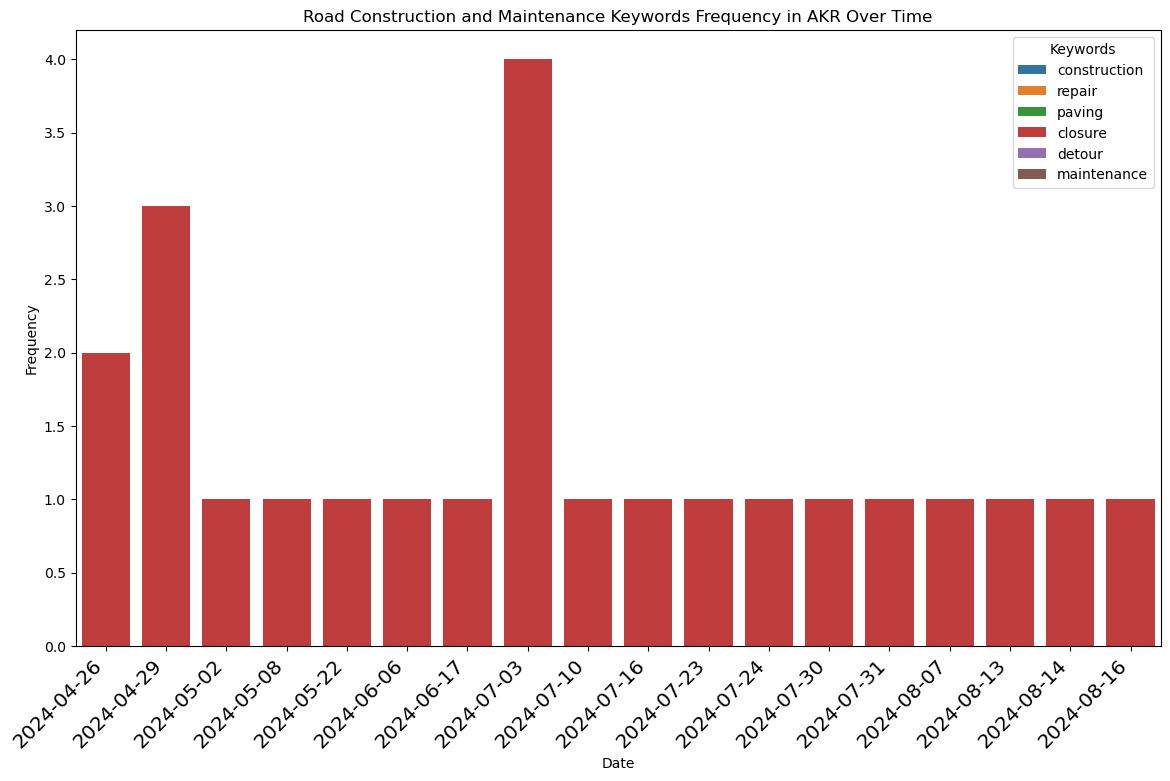

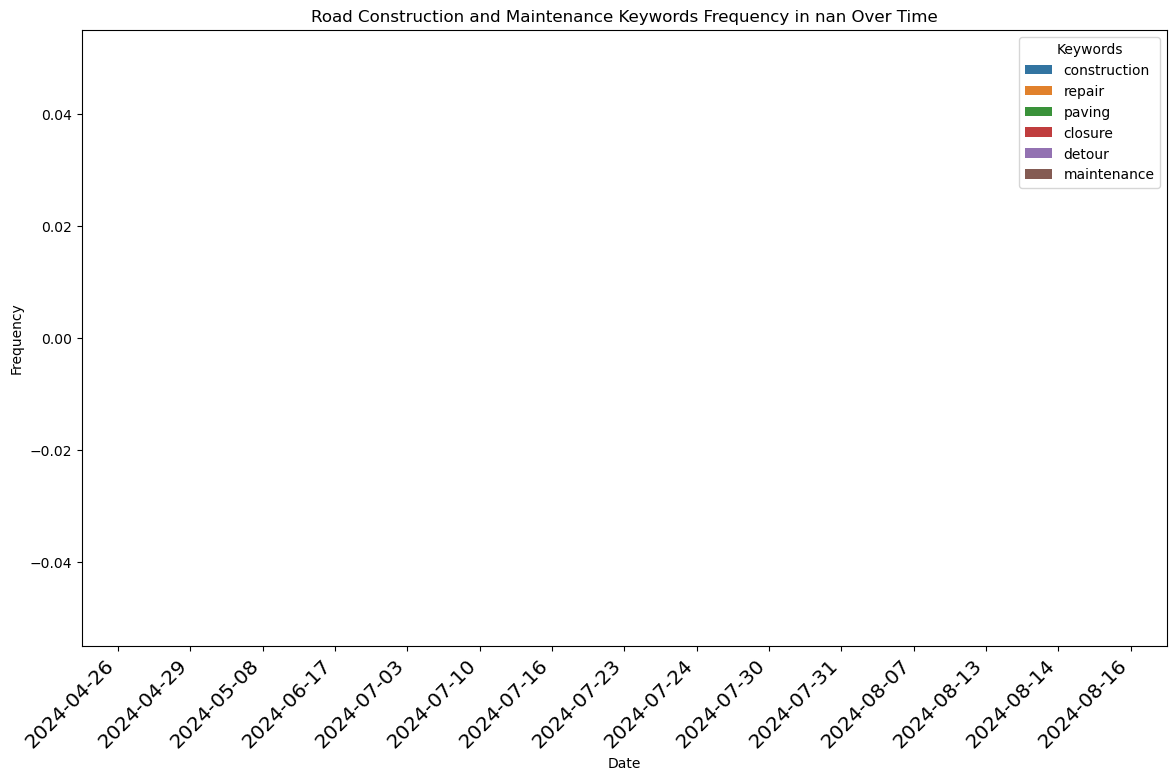

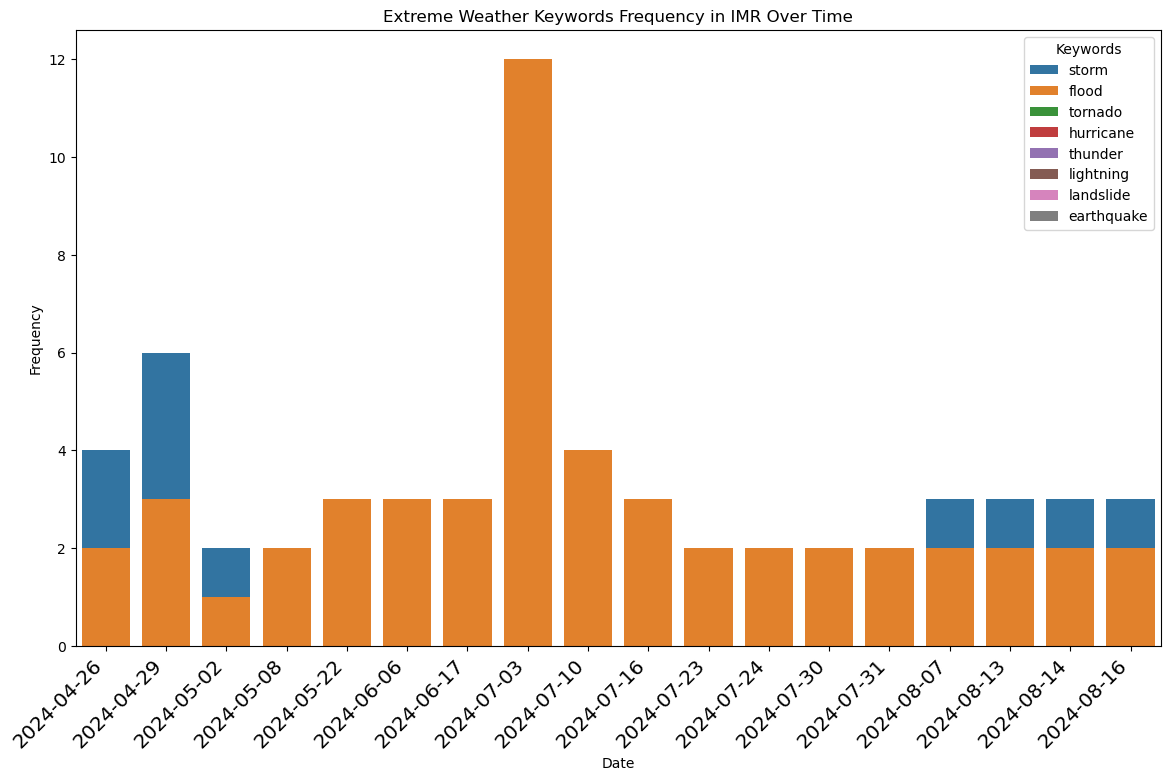

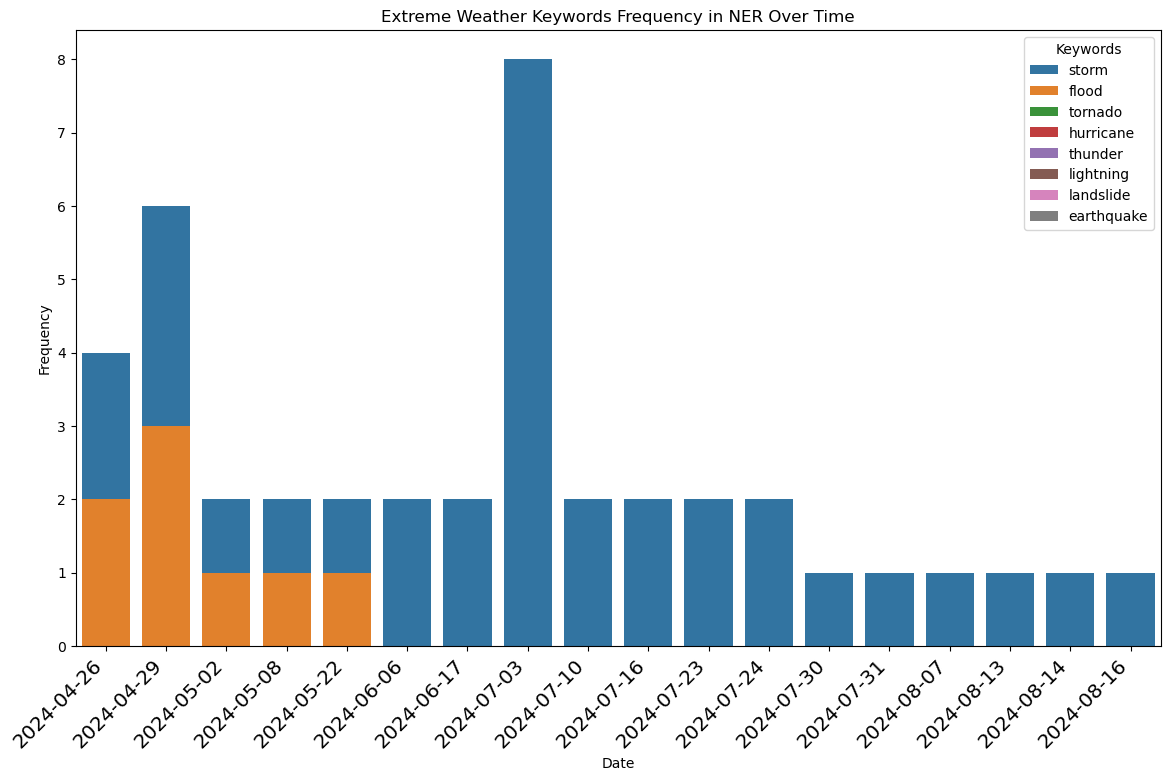

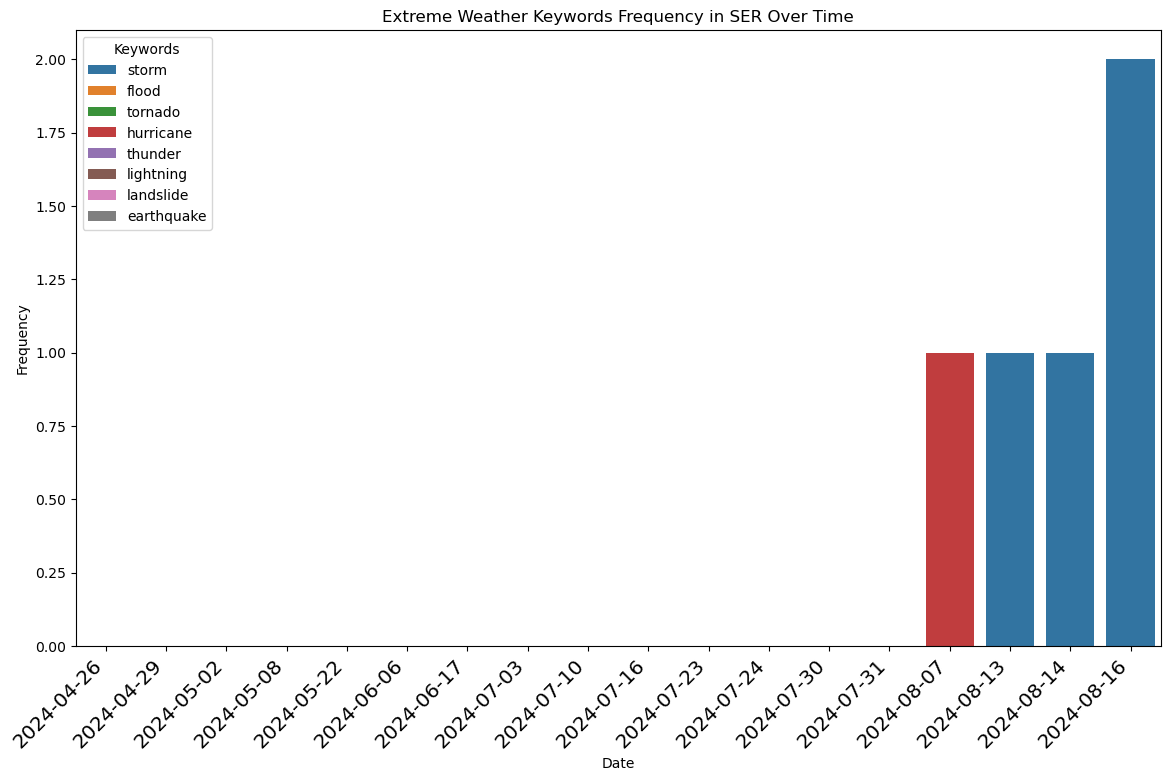

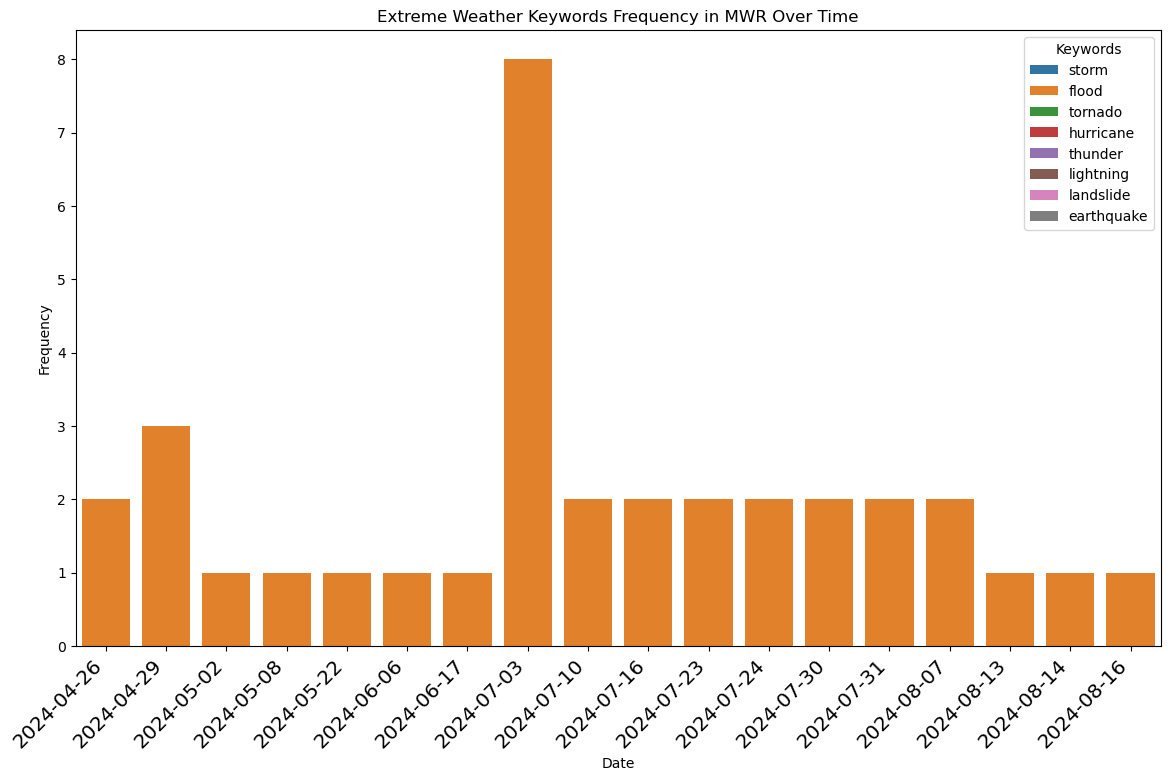

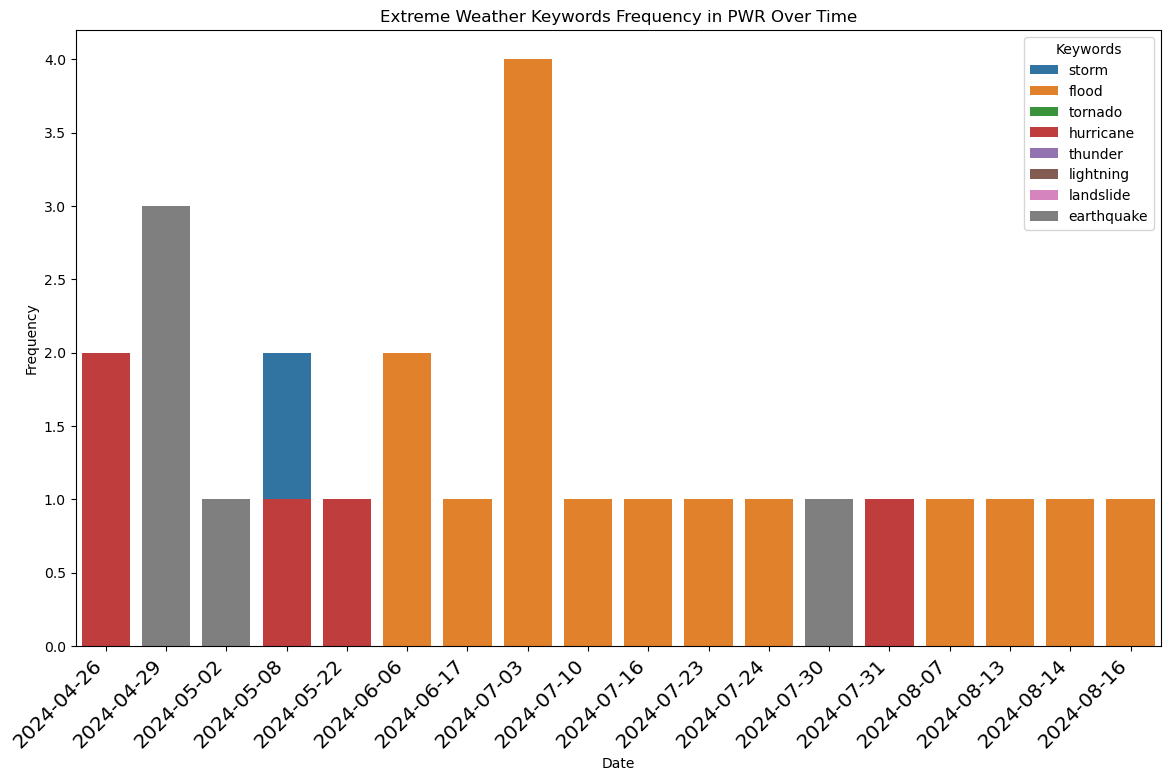

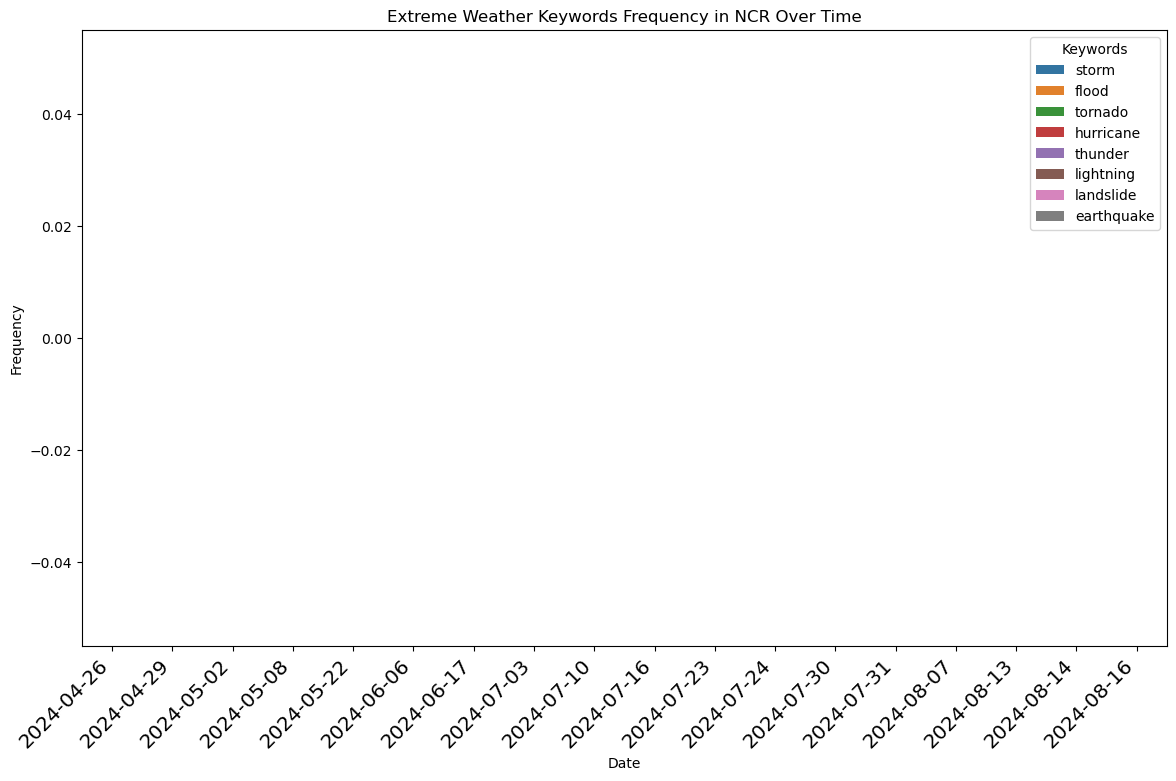

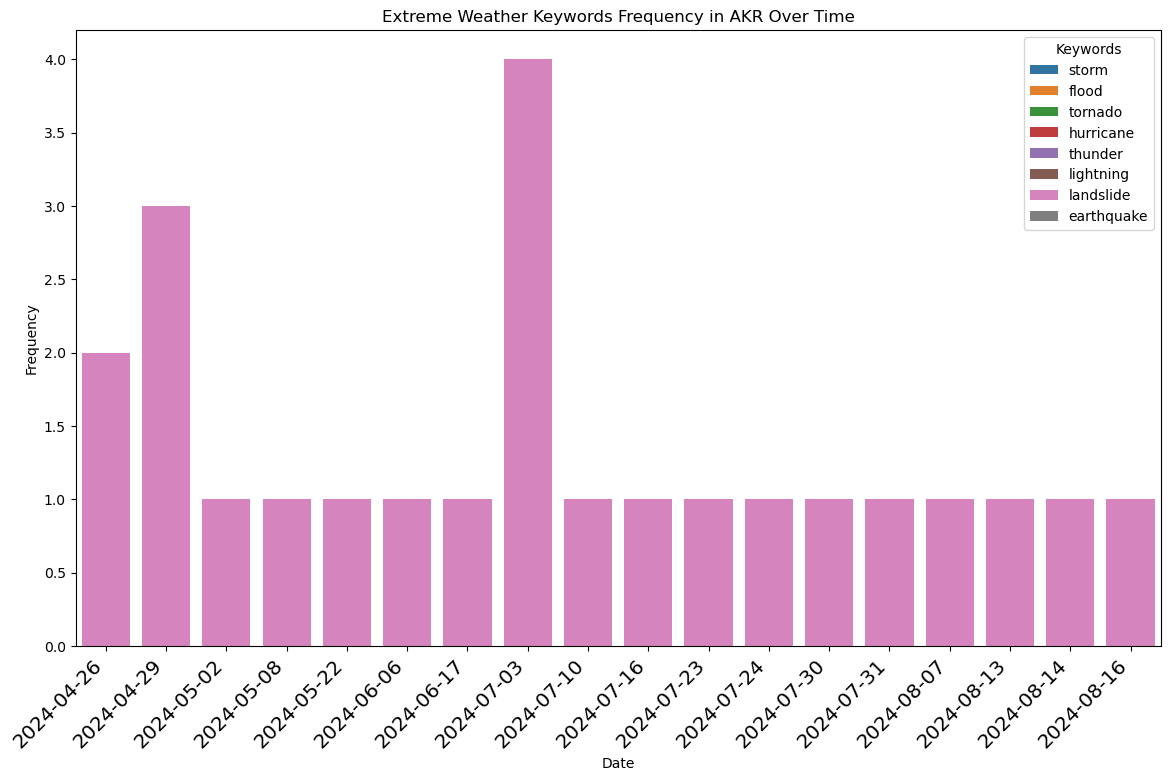

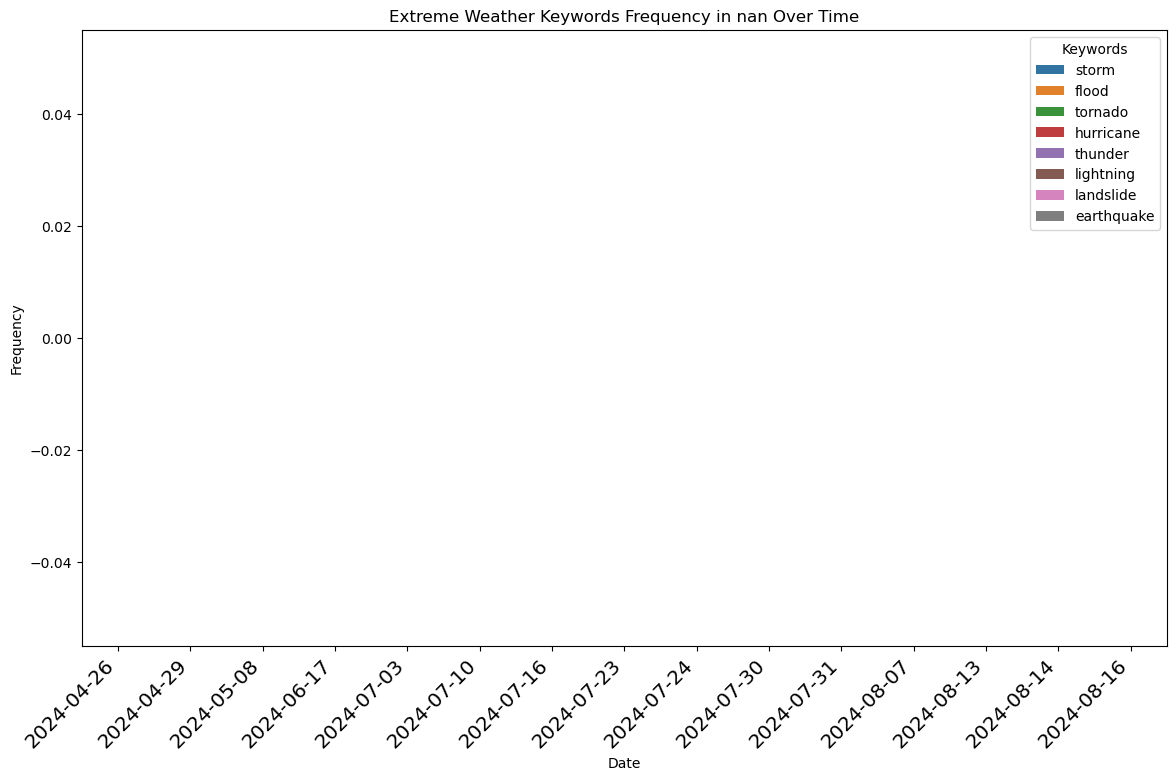

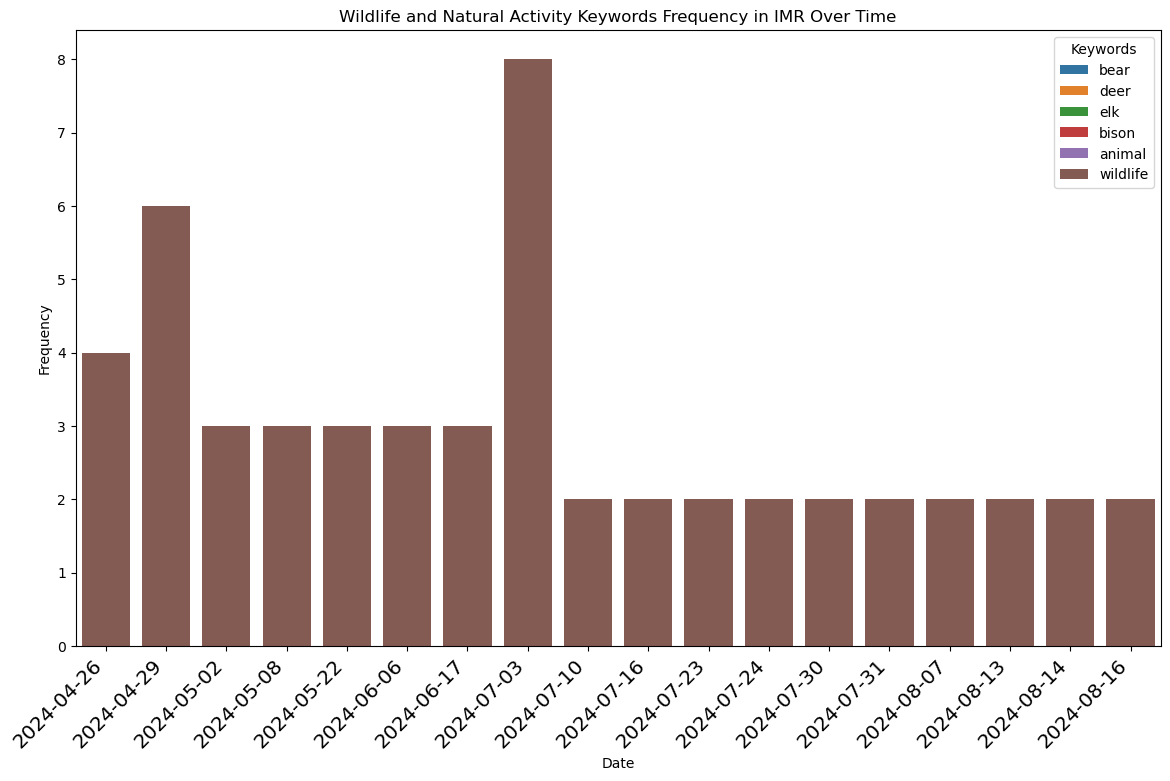

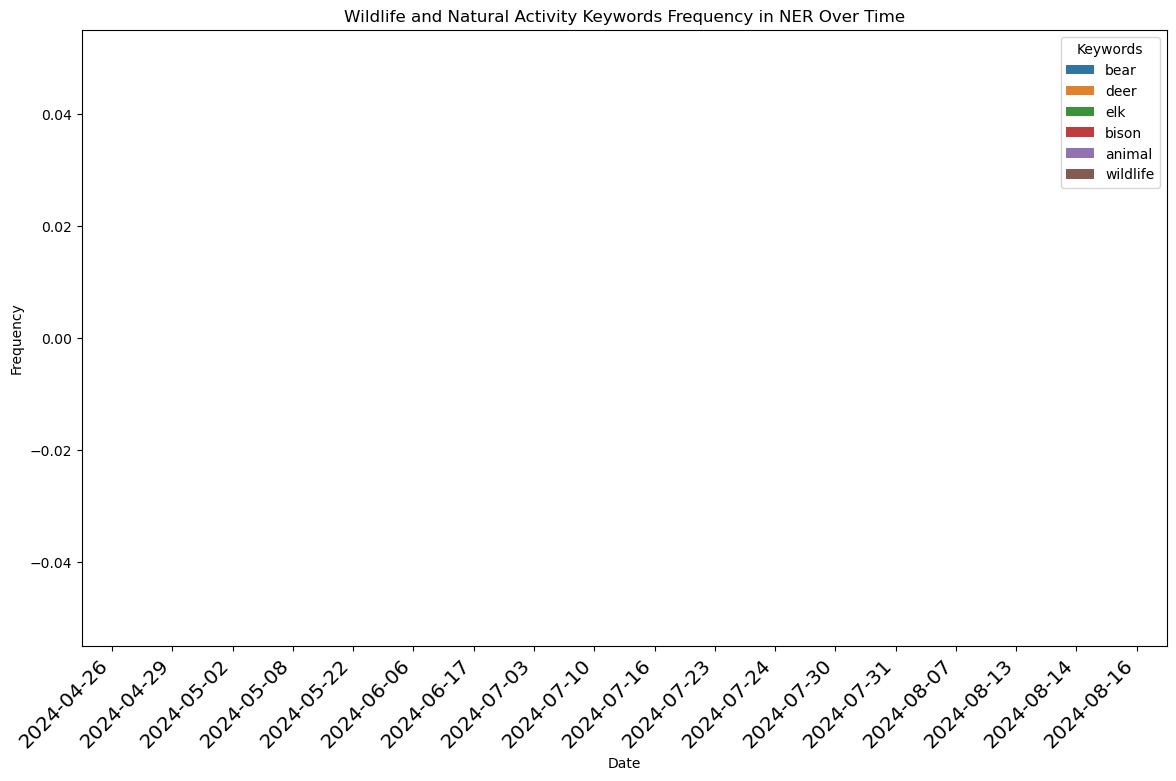

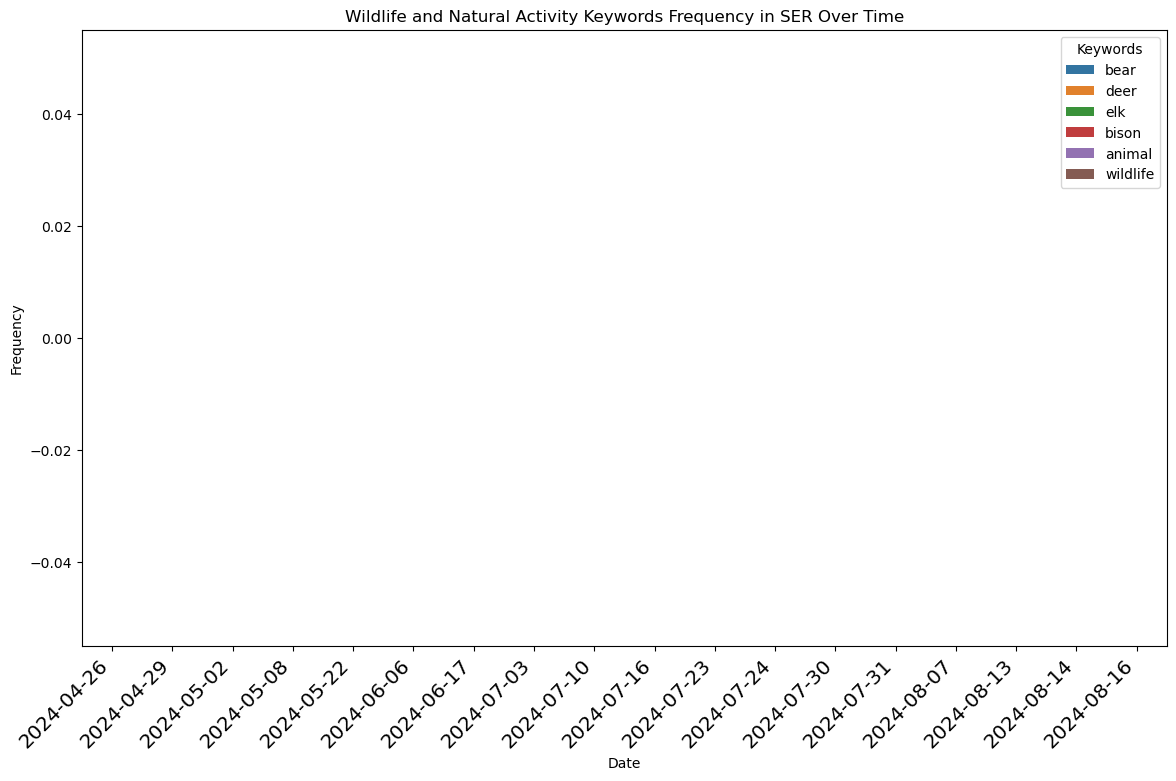

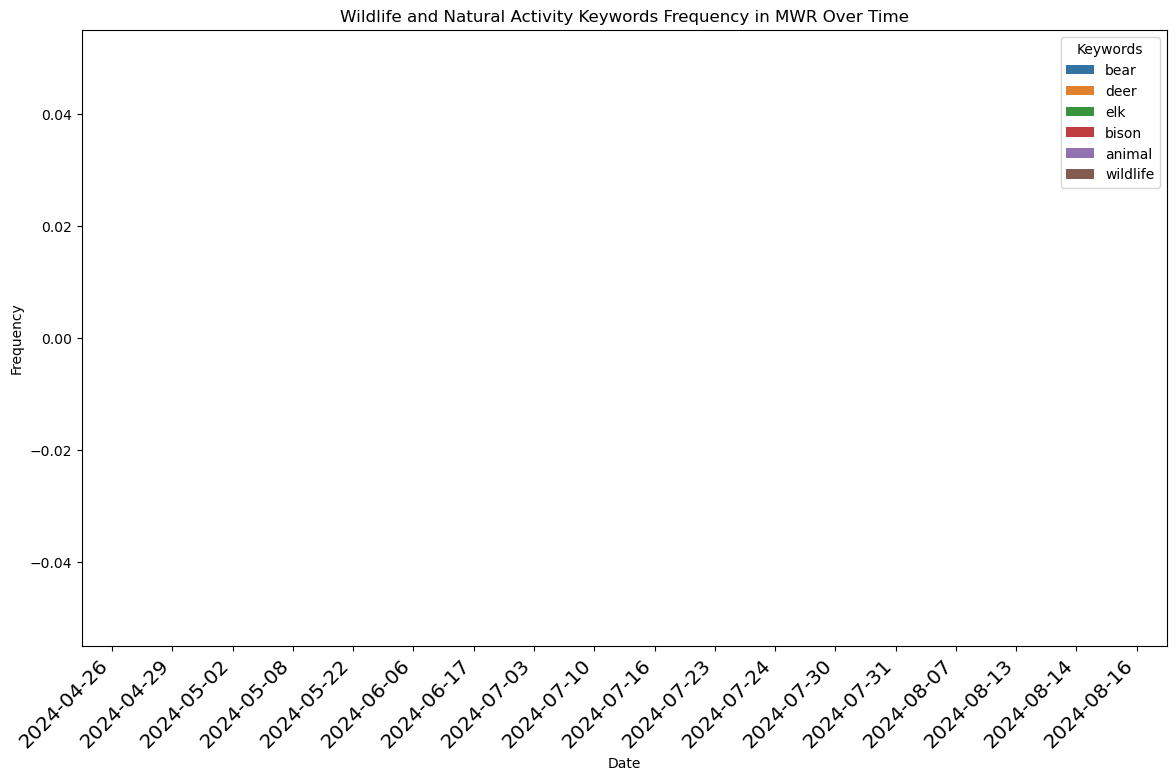

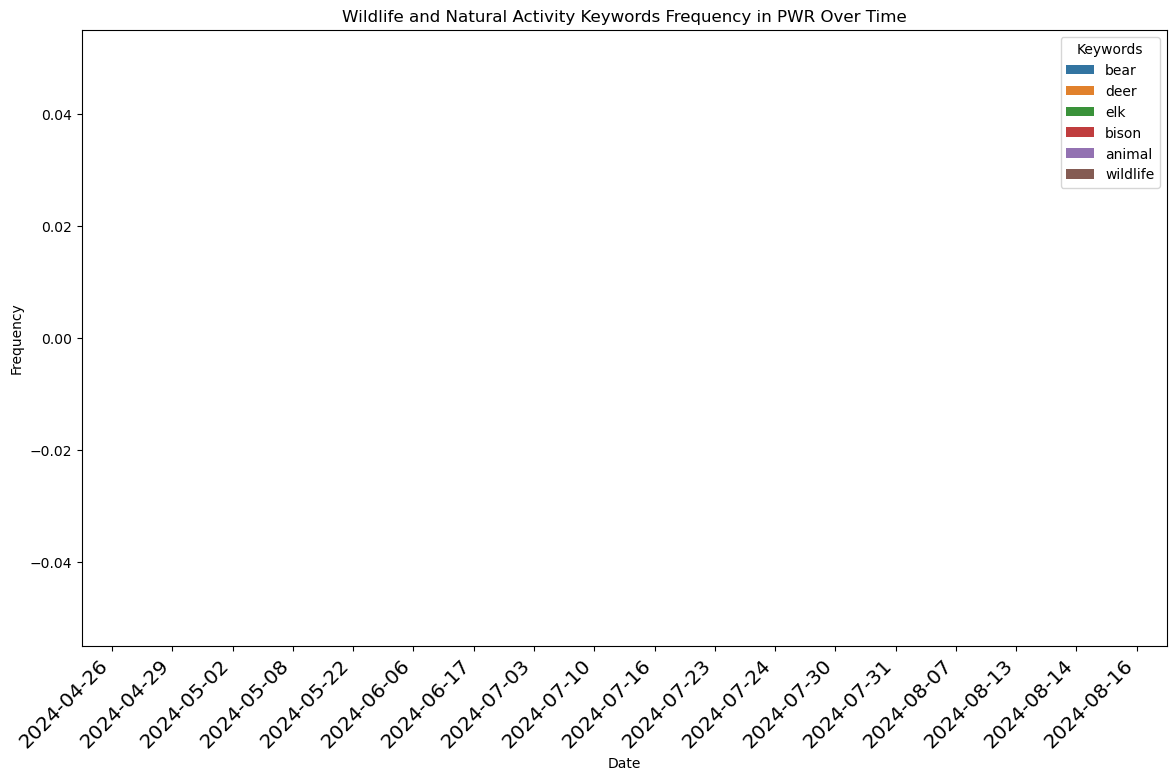

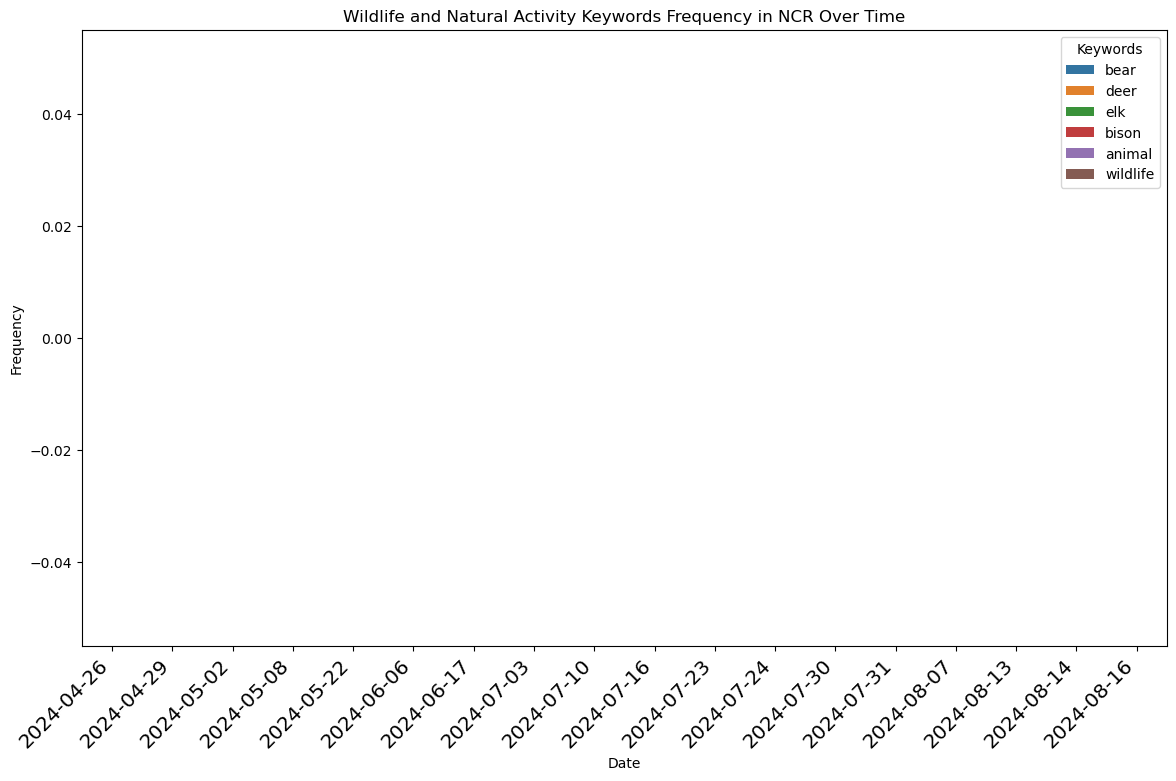

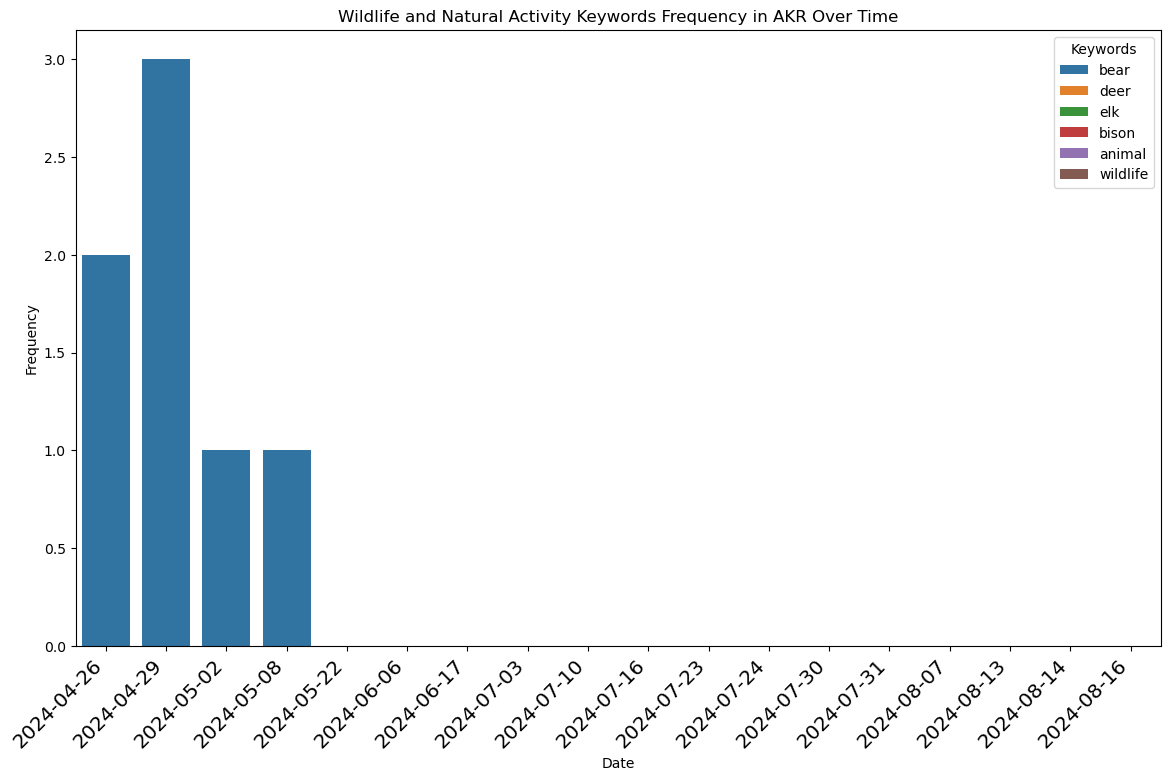

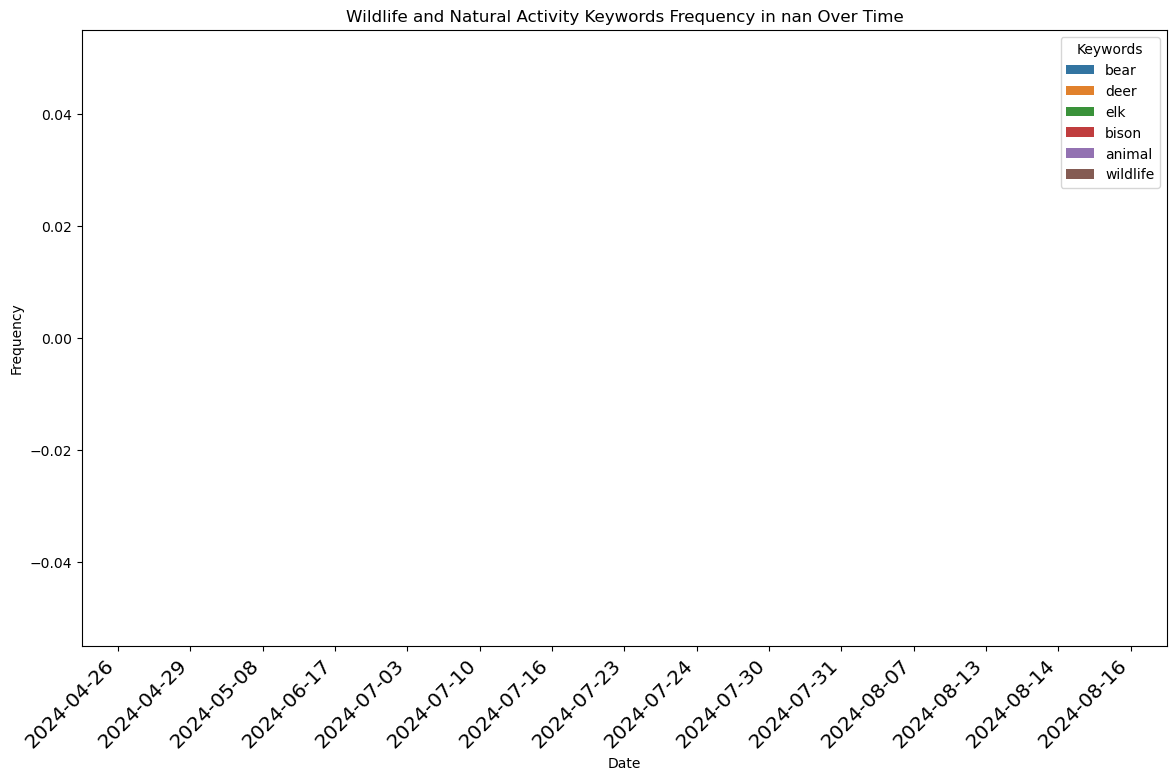

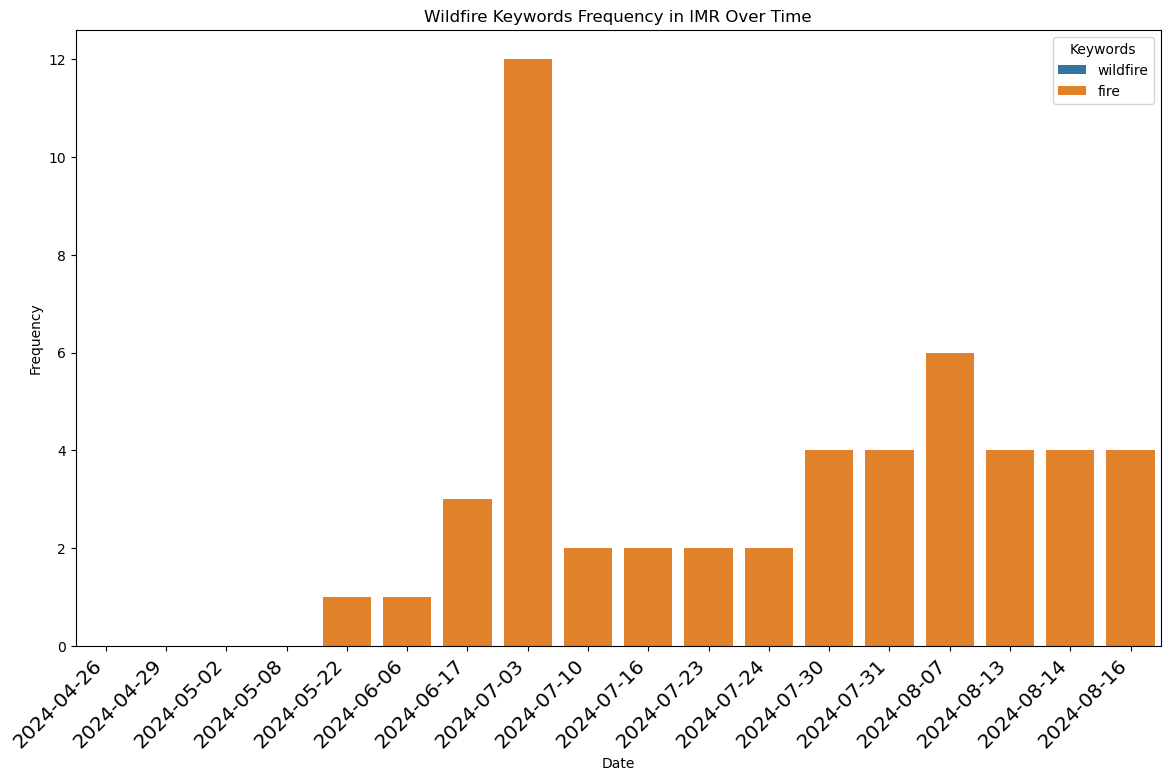

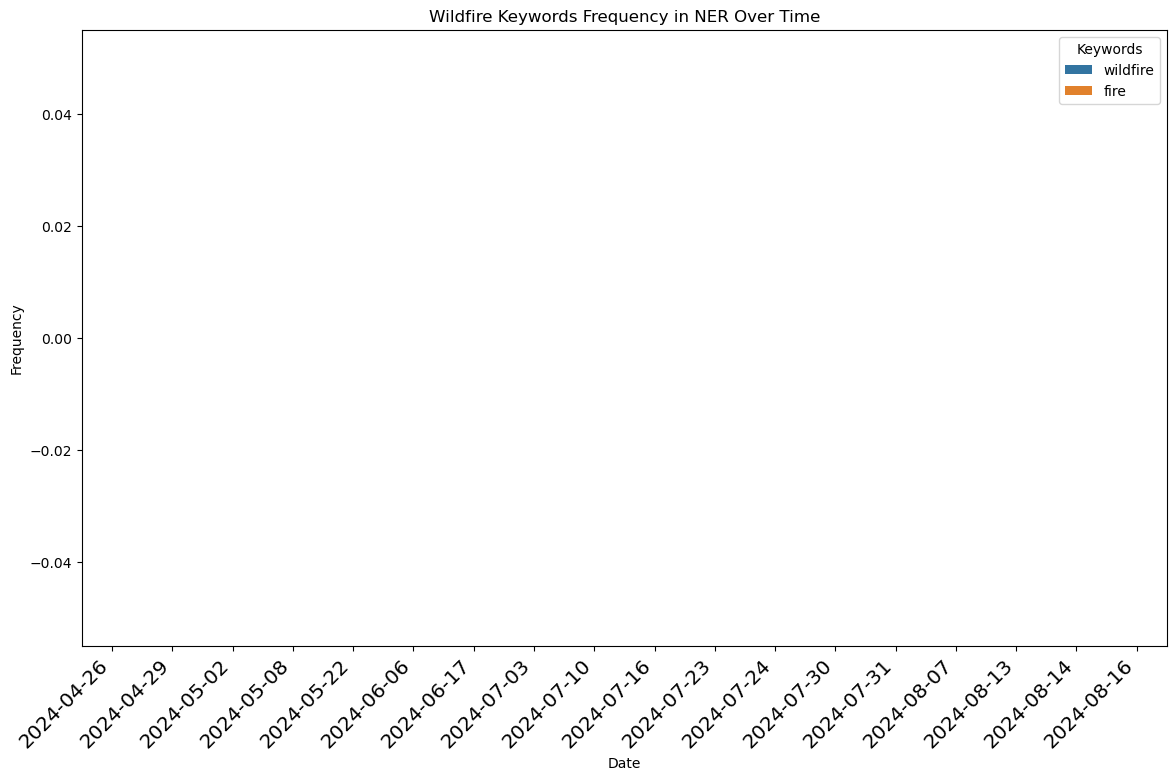

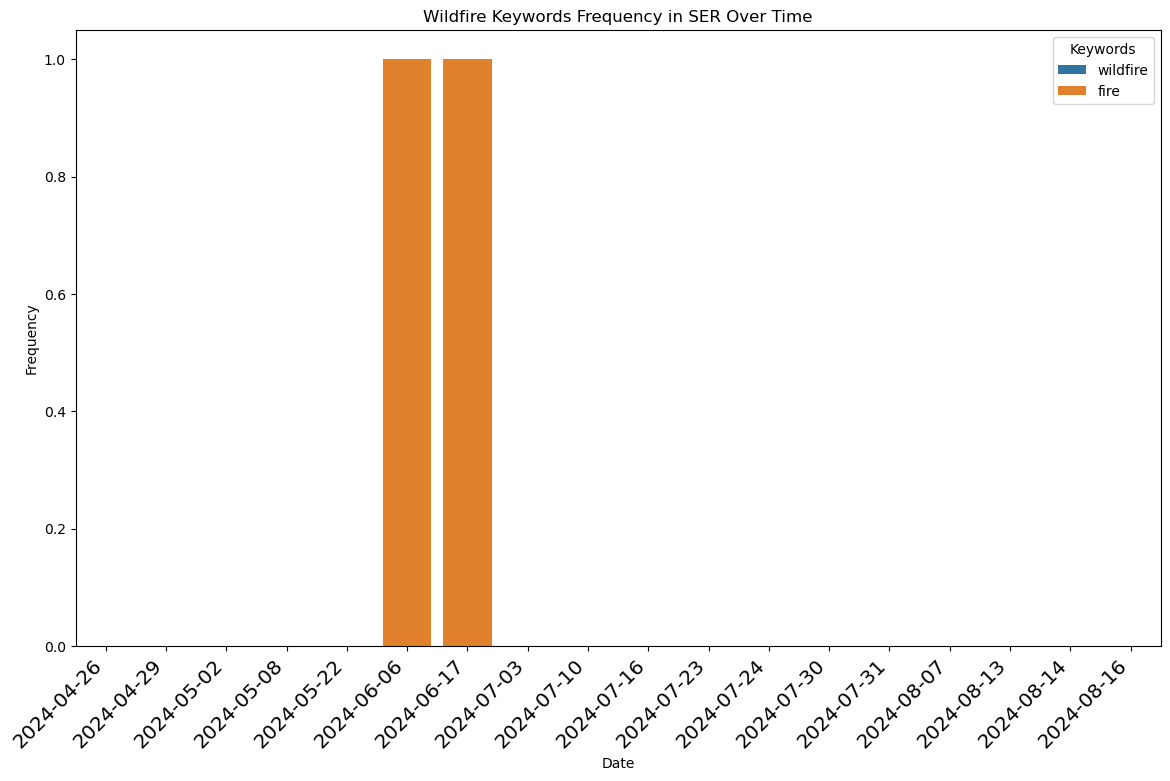

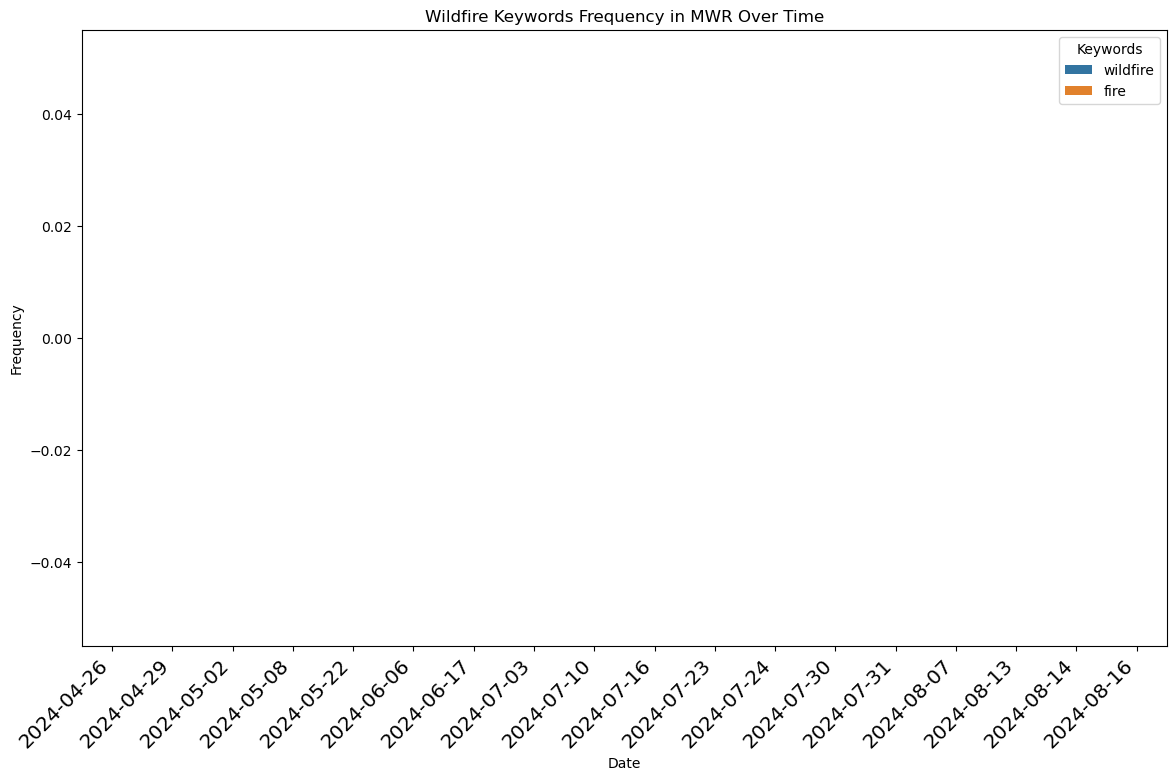

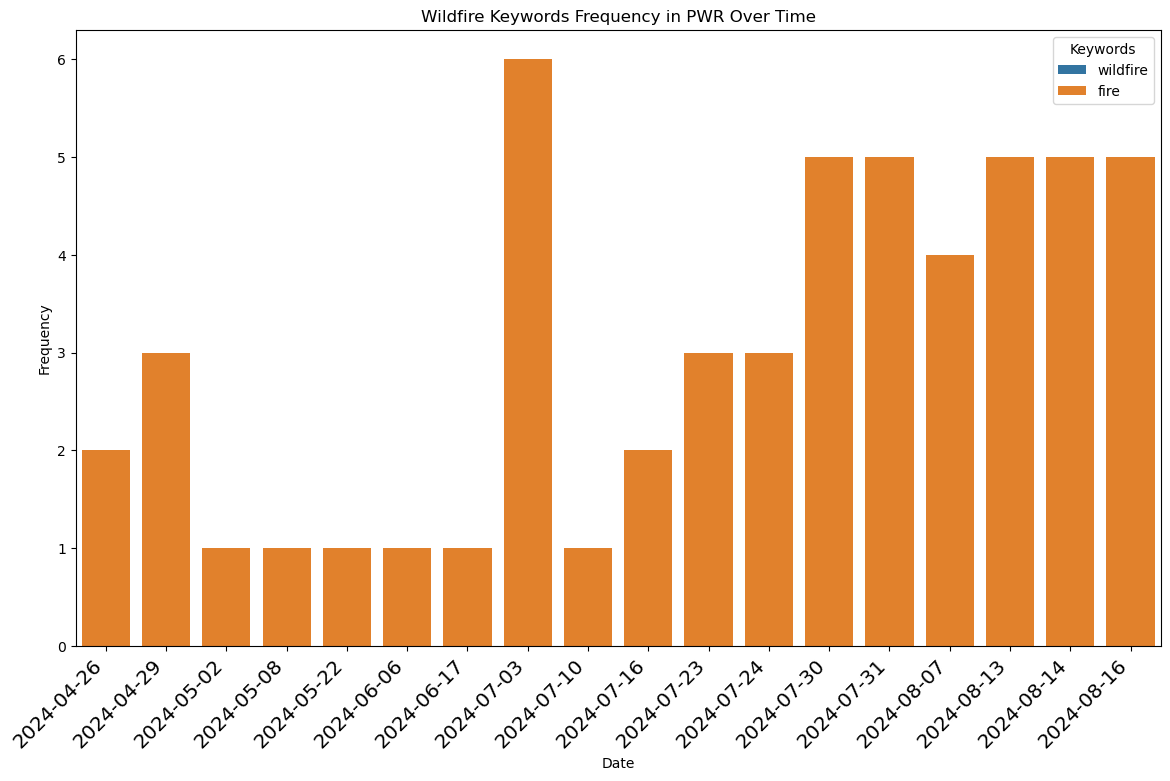

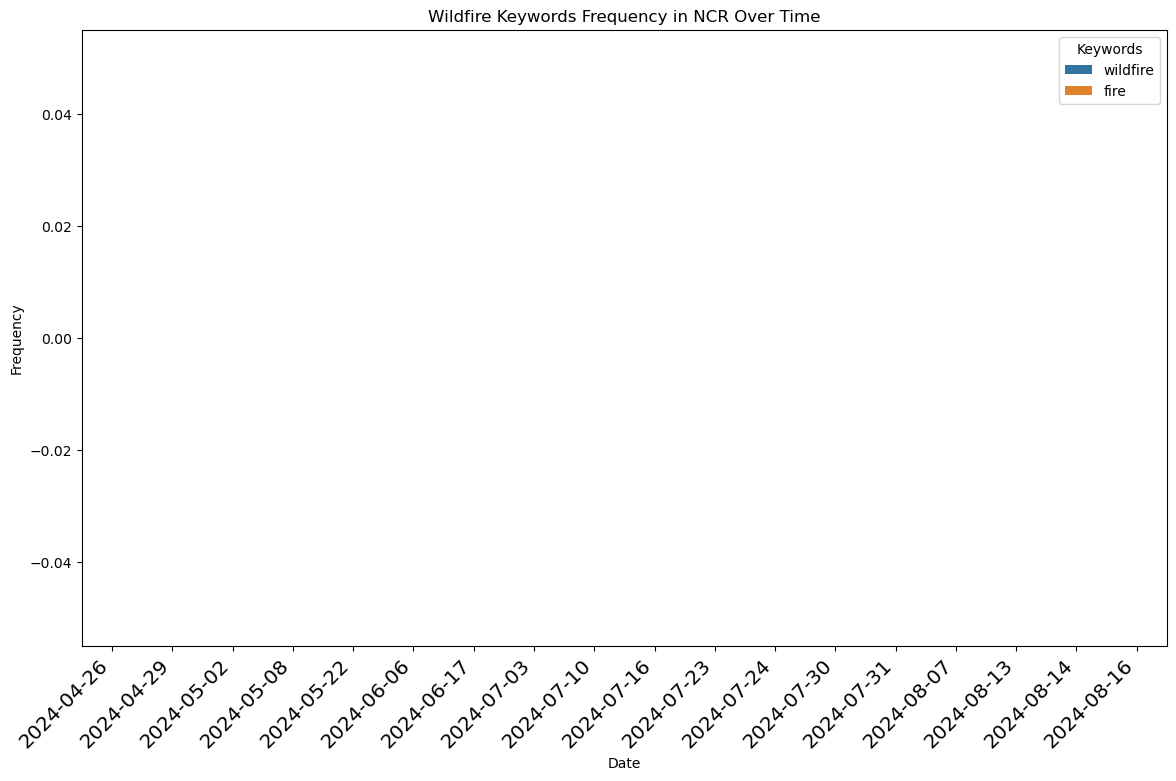

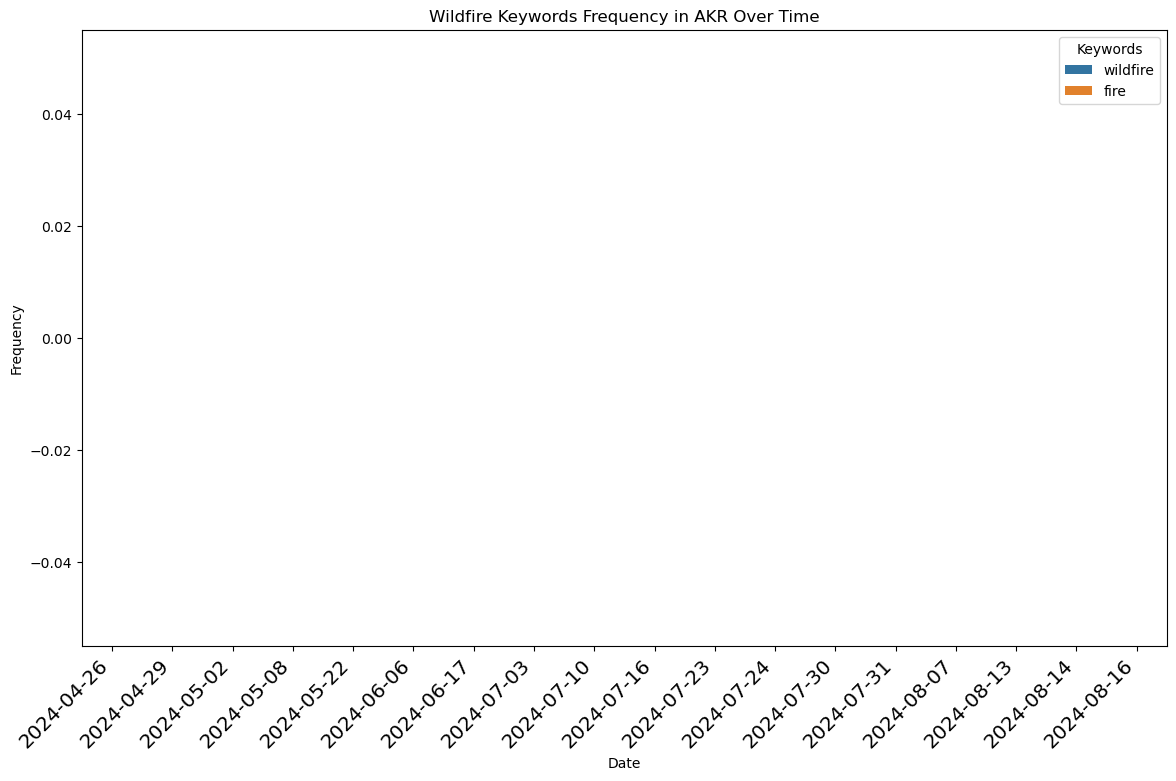

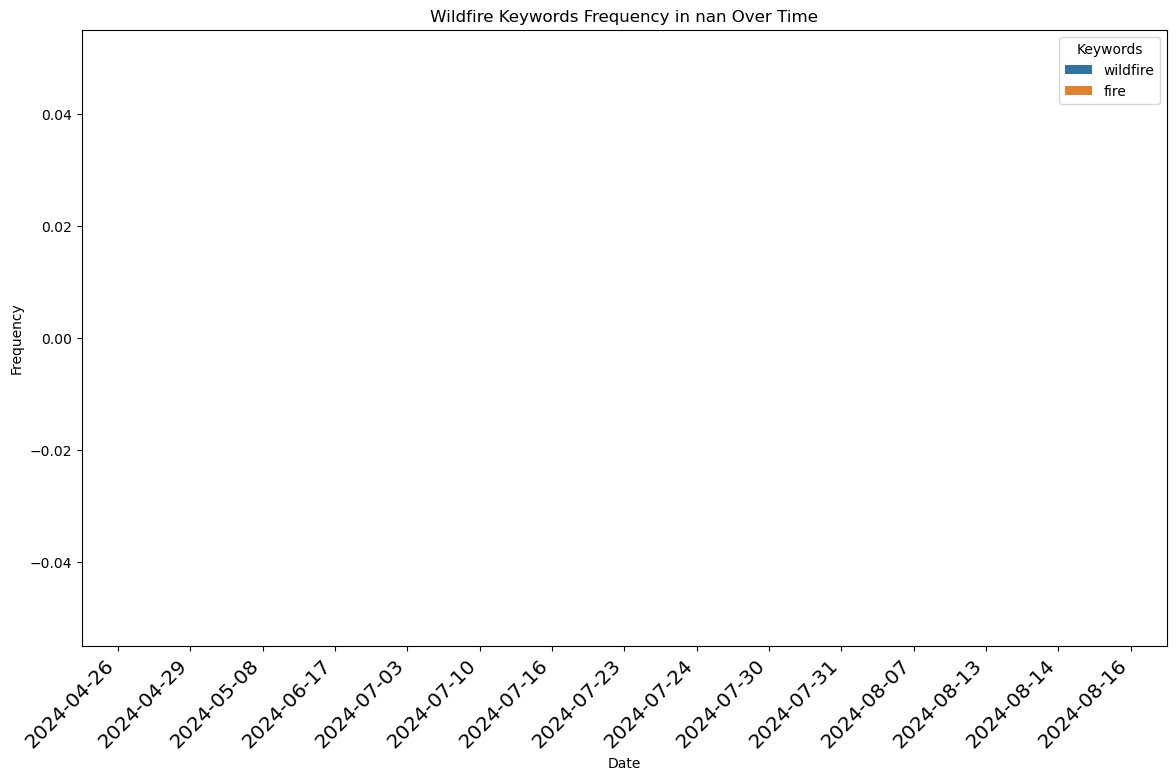

In [2]:
# Define the keyword sets
keyword_sets = {
    'Winter Weather': ['snow', 'ice', 'sleet', 'blizzard', 'frost', 'freeze'],
    'Summer Weather': ['heat', 'hot', 'humid', 'drought', 'sun', 'warm'],
    'Road Construction and Maintenance': ['construction', 'repair', 'paving', 'closure', 'detour', 'maintenance'],
    'Extreme Weather': ['storm', 'flood', 'tornado', 'hurricane', 'thunder', 'lightning', 'landslide', 'earthquake'],
    'Wildlife and Natural Activity': ['bear', 'deer', 'elk', 'bison', 'animal', 'wildlife'],
    'Wildfire': ['wildfire', 'fire']
}

# Ensure 'date' is in datetime format
alerts_df3['date'] = pd.to_datetime(alerts_df3['date'],format='mixed')

# Initialize a dictionary to store frequency counts for each keyword set by park region
keyword_freqs = {
    category: {region: {'date': [], **{keyword: [] for keyword in keywords}} 
               for region in alerts_df3['Reg'].unique()}
    for category, keywords in keyword_sets.items()
}

alerts_df3['description'] = alerts_df3['description'].astype(str).str.lower()

# Iterate through the DataFrame
for i, row in alerts_df3.iterrows():
    date = row['date']
    region = row['Reg']
    description = row['description']
    
    for category, keywords in keyword_sets.items():
        keyword_freqs[category][region]['date'].append(date)
        for keyword in keywords:
            if re.findall(keyword, description):
            #if re.search(r'\b' + keyword + r'\b', description):
                keyword_freqs[category][region][keyword].append(1)
            else:
                keyword_freqs[category][region][keyword].append(0)

# Convert each keyword_freqs category and region dictionary to a DataFrame
keyword_dfs = {
    category: {region: pd.DataFrame(data) 
               for region, data in regions.items()} 
    for category, regions in keyword_freqs.items()
}

#print(keyword_dfs)

# Group by date and sum the occurrences for each category and region
for category in keyword_dfs:
    for region in keyword_dfs[category]:
        keyword_dfs[category][region] = keyword_dfs[category][region].groupby('date').sum().reset_index()

# Plotting for each category and region
for category, regions in keyword_dfs.items():
    for region, df in regions.items():
        plt.figure(figsize=(14, 8))
        for keyword in keyword_sets[category]:
            sns.barplot(data=df, x='date', y=keyword, label=keyword)
        plt.title(f'{category} Keywords Frequency in {region} Over Time')
        plt.xlabel('Date')
        plt.ylabel('Frequency')
        plt.legend(title='Keywords')
        plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
        plt.savefig(str(region) + category + "plot.png", dpi=100)
        plt.show()
